In [ ]:
!pip install mwrogue

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mwrogue: filename=mwrogue-0.1.5-py3-none-any.whl size=14543 sha256=4c9b479dac60e23e72ad7fdf2b37ee3eb3dfad04f44617c2b520d88e2b1aa545
  Stored in directory: /root/.cache/pip/wheels/64/47/3b/4f89a319966413baa51f612cd5d6029a1e8b1b88edfdcc8ba1
  Created wheel for mwcleric: filename=mwcleric-0.8.8-py3-none-any.whl size=21498 sha256=5f91e79e46996e70087d5de52934a1e0a35e677d5df459c4f1d3f22343672403
  Stored in directory: /root/.cache/pip/wheels/49/97/45/b44bffcd86563c4ee3111010481c09f6675eecd93c67fdc791
Successfully built mwrogue mwcleric


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

from mwrogue.esports_client import EsportsClient
from mwrogue.auth_credentials import AuthCredentials

credentials = AuthCredentials(user_file="aaaaa")
site = EsportsClient('lol', credentials=credentials)


We will prompt for 3 separate things: Username, bot pw name, bot token name. Whitespace will be stripped.
What is your USERNAME (not bot password yet)?
What is your bot pw NAME (not token yet)?
What is your bot pw token/secret?


In [18]:
league = 'CBLOL'
response = site.cargo_client.query(
                      tables = "Tournaments=T, Leagues=L, MatchSchedule=M",
                      fields="L.League_Short=League, T.Name=Tournament, M.DateTime_UTC=Date, M.Team1Final=Team1, M.Team2Final=Team2, M.Team1Score, M.Team2Score",
                      where = 'L.League_Short = "'+league+'"',
                      join_on = "T.League = L.League, T.OverviewPage=M.OverviewPage")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
response

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[OrderedDict([('League', 'CBLOL'),
              ('Tournament', 'Brazilian Champions Series 2014'),
              ('Date', '2014-04-26 16:00:00'),
              ('Team1', 'KaBuM! Esports'),
              ('Team2', 'Team United'),
              ('Team1Score', '1'),
              ('Team2Score', '1'),
              ('Date__precision', '0')]),
 OrderedDict([('League', 'CBLOL'),
              ('Tournament', 'Brazilian Champions Series 2014'),
              ('Date', '2014-04-26 18:00:00'),
              ('Team1', 'Keyd Stars'),
              ('Team2', 'Team awp'),
              ('Team1Score', '2'),
              ('Team2Score', '0'),
              ('Date__precision', '0')]),
 OrderedDict([('League', 'CBLOL'),
              ('Tournament', 'Brazilian Champions Series 2014'),
              ('Date', '2014-04-27 14:00:00'),
              ('Team1', 'paiN Gaming'),
              ('Team2', 'Team United'),
              ('Team1Score', '0'),
              ('Team2Score', '2'),
              ('Date__prec

In [20]:
import pandas as pd

MatchData = pd.DataFrame(response)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
MatchData = MatchData.replace("",float("NaN")).dropna(axis='index', how='any')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
MatchData.sort_values(by="Date",inplace=True)
MatchData = MatchData.astype({'Team1Score':'int32','Team2Score':'int32'})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
MatchData["Date"] = pd.to_datetime(MatchData["Date"], format='%Y-%m-%d %H:%M:%S')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
MatchData = MatchData.drop("Date__precision", axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
renames = {
    'Keyd Stars': 'Vivo Keyd Stars',
    'Vivo Keyd': 'Vivo Keyd Stars',
    'KaBuM! Orange': 'KaBuM! Esports',
    'Vorax Liberty': 'Liberty',
    'FURIA Uppercut': 'FURIA',
    'Flamengo Los Grandes': 'Los Grandes',
}
for old_name, new_name in renames.items():
    MatchData.replace({'Team1': old_name, 'Team2': old_name}, new_name, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
MatchData['Team1'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['KaBuM! Esports', 'Vivo Keyd Stars', 'paiN Gaming',
       'CNB e-Sports Club', 'Team awp', 'KaBuM! Black', 'JAYOB e-Sports',
       'INTZ', 'Dexterity Team', 'INTZ Red', 'g3nerationX', 'Team Dioud',
       'Team Espeon', 'Team Alocs', 'RED Canids',
       'Operation Kino e-Sports', 'Big Gods', 'Remo Brave e-Sports',
       'T Show', 'Team oNe eSports', 'ProGaming Esports',
       'Flamengo Esports', 'Ilha da Macacada Gaming',
       'Razer Pichau Gaming', 'Uppercut esports',
       'Redemption eSports Porto Alegre', 'Prodigy Esports', 'FURIA',
       'Santos e-Sports', 'Rensga Esports', 'Vorax', 'Cruzeiro eSports',
       'LOUD', 'Netshoes Miners', 'Liberty', 'Los Grandes', 'Miners',
       'Fluxo'], dtype=object)

In [27]:
MatchData['Team2'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Team United', 'Team awp', 'KaBuM! Esports', 'Vivo Keyd Stars',
       'CNB e-Sports Club', 'paiN Gaming', 'Dexterity Team',
       'JAYOB e-Sports', 'INTZ', 'KaBuM! Black', 'Keyd Warriors',
       'IMP e-Sports', 'INTZ Red', 'g3nerationX', 'Santos Dexterity',
       'Big Gods', 'Team Alocs', 'Team Loop', 'Team Espeon',
       'Operation Kino e-Sports', 'RED Canids',
       'Overload (Brazilian Team)', 'Remo Brave e-Sports',
       'e-Champ Gaming', 'Team Genesis', 'INTZ.Genesis',
       'ProGaming Esports', 'Team oNe eSports', 'T Show',
       'Iron Hawks e-Sports', 'Flamengo Esports',
       'Ilha da Macacada Gaming', 'Uppercut esports',
       'Redemption eSports Porto Alegre', 'FURIA', 'Prodigy Esports',
       'Santos e-Sports', 'LOUD', 'Cruzeiro eSports', 'Vorax',
       'Rensga Esports', 'Liberty', 'Netshoes Miners', 'Miners',
       'Los Grandes', 'Fluxo'], dtype=object)

In [28]:
MatchData

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,League,Tournament,Date,Team1,Team2,Team1Score,Team2Score
0,CBLOL,Brazilian Champions Series 2014,2014-04-26 16:00:00,KaBuM! Esports,Team United,1,1
1,CBLOL,Brazilian Champions Series 2014,2014-04-26 18:00:00,Vivo Keyd Stars,Team awp,2,0
2,CBLOL,Brazilian Champions Series 2014,2014-04-27 14:00:00,paiN Gaming,Team United,0,2
3,CBLOL,Brazilian Champions Series 2014,2014-04-27 16:00:00,Vivo Keyd Stars,KaBuM! Esports,2,0
4,CBLOL,Brazilian Champions Series 2014,2014-04-27 18:00:00,CNB e-Sports Club,Team awp,1,1
...,...,...,...,...,...,...,...
1286,CBLOL,CBLOL 2024 Split 1,2024-02-04 16:00:00,RED Canids,Fluxo,0,1
1287,CBLOL,CBLOL 2024 Split 1,2024-02-04 17:00:00,KaBuM! Esports,paiN Gaming,0,1
1288,CBLOL,CBLOL 2024 Split 1,2024-02-04 18:00:00,INTZ,LOUD,0,1
1289,CBLOL,CBLOL 2024 Split 1,2024-02-04 19:00:00,Los Grandes,FURIA,0,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


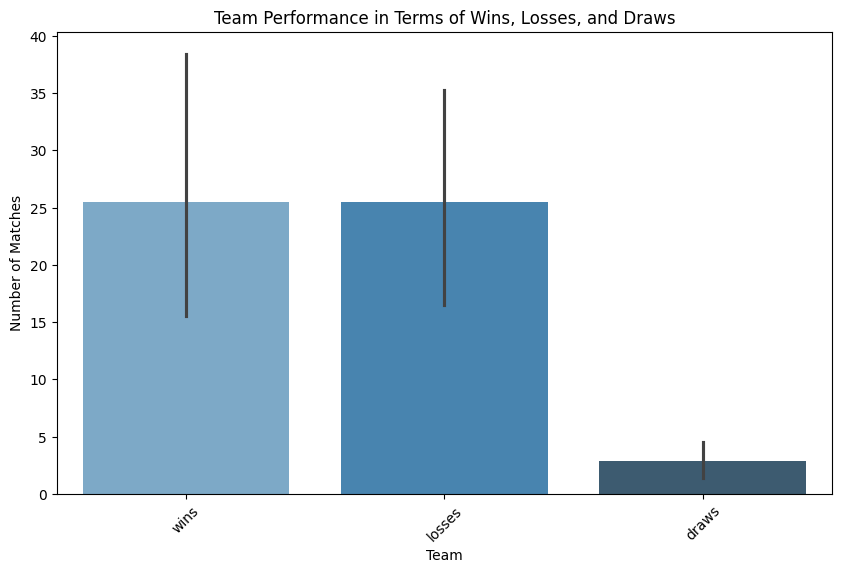

,wins,losses,draws
KaBuM! Esports,132,138,11
Team United,1,7,2
Vivo Keyd Stars,95,84,17
Team awp,1,5,4
paiN Gaming,151,95,27


In [29]:
team_performance = {}
for index, row in MatchData.iterrows():
    team1, team2 = row['Team1'], row['Team2']
    score1, score2 = row['Team1Score'], row['Team2Score']

    # Initialize dictionary for new teams
    if team1 not in team_performance:
        team_performance[team1] = {'wins': 0, 'losses': 0, 'draws': 0}
    if team2 not in team_performance:
        team_performance[team2] = {'wins': 0, 'losses': 0, 'draws': 0}

    # Update records
    if score1 > score2:
        team_performance[team1]['wins'] += 1
        team_performance[team2]['losses'] += 1
    elif score1 < score2:
        team_performance[team1]['losses'] += 1
        team_performance[team2]['wins'] += 1
    else:
        team_performance[team1]['draws'] += 1
        team_performance[team2]['draws'] += 1

# Convert to DataFrame for visualization
team_performance_df = pd.DataFrame.from_dict(team_performance, orient='index')

# Plotting the performance
plt.figure(figsize=(10, 6))
sns.barplot(data=team_performance_df, palette="Blues_d")
plt.title("Team Performance in Terms of Wins, Losses, and Draws")
plt.xlabel("Team")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45)
plt.show()

team_performance_df.head()  # Displaying the first few rows of the performance DataFrame for verification


In [30]:
team_performance_df.sort_values(by=['wins'], ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,wins,losses,draws
paiN Gaming,151,95,27
INTZ,133,137,12
KaBuM! Esports,132,138,11
RED Canids,109,66,7
Flamengo Esports,100,56,0
Vivo Keyd Stars,95,84,17
LOUD,82,44,0
FURIA,78,87,0
CNB e-Sports Club,50,56,21
Liberty,40,59,0


In [31]:
#performance por ano

# Ajustando o código para considerar o desempenho por ano

# Supondo que MatchData seja o mesmo que df no exemplo anterior
MatchData_yearly = MatchData.copy()
MatchData_yearly['Year'] = MatchData_yearly['Date'].dt.year

team_performance_by_year = {}

for index, row in MatchData_yearly.iterrows():
    team1, team2 = row['Team1'], row['Team2']
    score1, score2 = row['Team1Score'], row['Team2Score']
    year = row['Year']

    # Initialize dictionary for new teams and new years
    if team1 not in team_performance_by_year:
        team_performance_by_year[team1] = {}
    if team2 not in team_performance_by_year:
        team_performance_by_year[team2] = {}

    if year not in team_performance_by_year[team1]:
        team_performance_by_year[team1][year] = {'wins': 0, 'losses': 0, 'draws': 0}
    if year not in team_performance_by_year[team2]:
        team_performance_by_year[team2][year] = {'wins': 0, 'losses': 0, 'draws': 0}

    # Update records
    if score1 > score2:
        team_performance_by_year[team1][year]['wins'] += 1
        team_performance_by_year[team2][year]['losses'] += 1
    elif score1 < score2:
        team_performance_by_year[team1][year]['losses'] += 1
        team_performance_by_year[team2][year]['wins'] += 1
    else:
        team_performance_by_year[team1][year]['draws'] += 1
        team_performance_by_year[team2][year]['draws'] += 1

# Criando um DataFrame para visualização
team_performance_by_year_df = pd.DataFrame.from_dict({(outerKey, innerKey): values for outerKey, innerDict in team_performance_by_year.items() for innerKey, values in innerDict.items()}, orient='index')

team_performance_by_year_df.head()  # Exibindo as primeiras linhas do DataFrame para verificação



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


wins  losses  draws
KaBuM! Esports 2014     4       8      1
               2015     6      10      4
               2016     4       7      5
               2017     1       6      1
               2018    13       3      0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


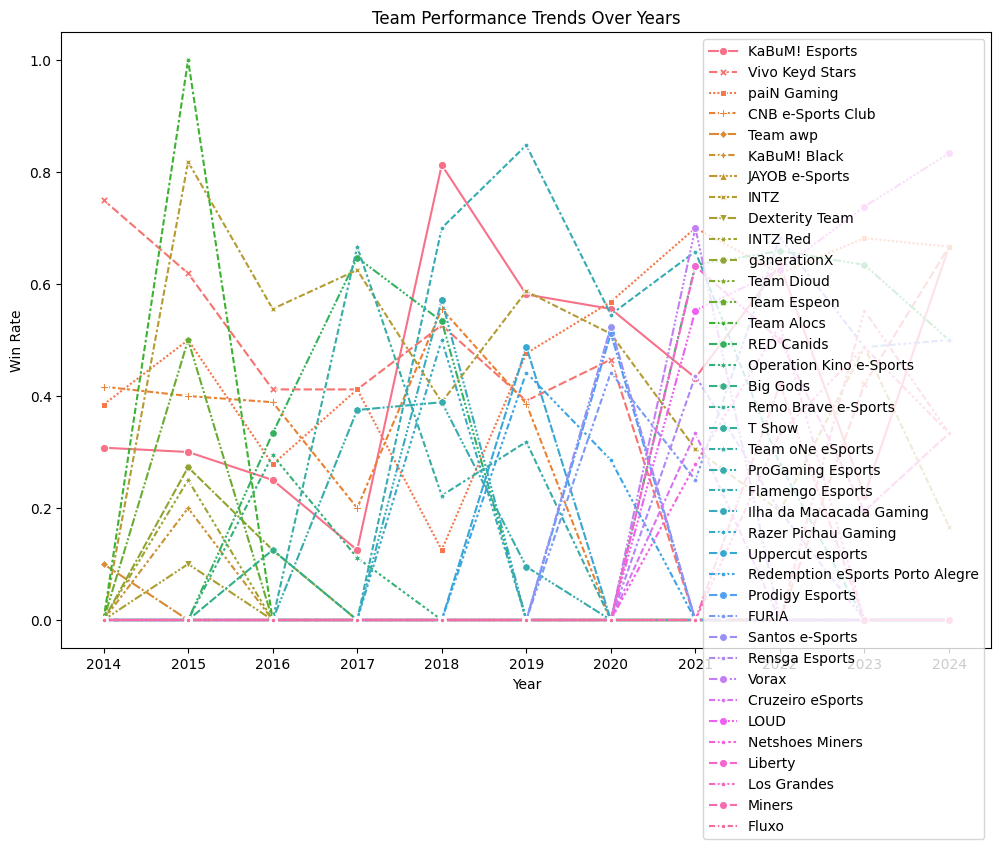

,KaBuM! Esports,Vivo Keyd Stars,paiN Gaming,CNB e-Sports Club,Team awp,KaBuM! Black,JAYOB e-Sports,INTZ,Dexterity Team,INTZ Red,...,Santos e-Sports,Rensga Esports,Vorax,Cruzeiro eSports,LOUD,Netshoes Miners,Liberty,Los Grandes,Miners,Fluxo
2014,0.307692,0.750000,0.384615,0.416667,0.1,0.0,0.0,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,0.300000,0.619048,0.500000,0.400000,0.0,0.2,0.0,0.818182,0.1,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016,0.250000,0.411765,0.277778,0.388889,0.0,0.0,0.0,0.555556,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,0.125000,0.411765,0.411765,0.200000,0.0,0.0,0.0,0.625000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,0.812500,0.526316,0.125000,0.555556,0.0,0.0,0.0,0.388889,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
temporal_analysis = MatchData

# Ensuring 'Date' is of datetime type
temporal_analysis['Date'] = pd.to_datetime(temporal_analysis['Date'])

# Extracting year and month
temporal_analysis['Year'] = temporal_analysis['Date'].dt.year
temporal_analysis['Month'] = temporal_analysis['Date'].dt.month

# Analysis: Temporal Performance Trends
# Calculating win rate for each team per year
def calculate_win_rate(team, year):
    team_games = temporal_analysis[(temporal_analysis['Team1'] == team) | (temporal_analysis['Team2'] == team)]
    team_games_year = team_games[team_games['Year'] == year]

    wins = 0
    total_games = len(team_games_year)
    for _, row in team_games_year.iterrows():
        if (row['Team1'] == team and row['Team1Score'] > row['Team2Score']) or \
           (row['Team2'] == team and row['Team2Score'] > row['Team1Score']):
            wins += 1

    return wins / total_games if total_games > 0 else 0

teams = temporal_analysis['Team1'].unique()
team_yearly_performance = {team: {year: calculate_win_rate(team, year) for year in temporal_analysis['Year'].unique()} for team in teams}

# Convert to DataFrame for visualization
team_yearly_performance_df = pd.DataFrame.from_dict(team_yearly_performance)

# Plotting the performance
plt.figure(figsize=(12, 8))
sns.lineplot(data=team_yearly_performance_df, markers=True)
plt.title("Team Performance Trends Over Years")
plt.xlabel("Year")
plt.ylabel("Win Rate")
plt.xticks(MatchData['Year'].unique())
plt.show()

team_yearly_performance_df.head()  # Displaying the data for verification



In [33]:
# Identificando as equipes ativas em 2023
equipes_ativas = temporal_analysis[temporal_analysis['Year'] == 2023]['Team1'].unique().tolist() + temporal_analysis[temporal_analysis['Year'] == 2023]['Team2'].unique().tolist()
equipes_ativas = list(set(equipes_ativas))  # Removendo duplicatas

# Todas as equipes no DataFrame
todas_equipes = list(set(temporal_analysis['Team1'].unique().tolist() + temporal_analysis['Team2'].unique().tolist()))

# Identificando equipes inativas (que não estão na lista de equipes ativas de 2023)
equipes_inativas = [team for team in todas_equipes if team not in equipes_ativas]



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
equipes_ativas

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['INTZ',
 'Los Grandes',
 'LOUD',
 'FURIA',
 'paiN Gaming',
 'RED Canids',
 'Fluxo',
 'Vivo Keyd Stars',
 'Liberty',
 'KaBuM! Esports']

In [35]:
equipes_inativas

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Team Dioud',
 'Overload (Brazilian Team)',
 'Keyd Warriors',
 'JAYOB e-Sports',
 'Prodigy Esports',
 'Redemption eSports Porto Alegre',
 'ProGaming Esports',
 'Netshoes Miners',
 'Cruzeiro eSports',
 'Team Espeon',
 'Team Alocs',
 'Flamengo Esports',
 'INTZ Red',
 'Ilha da Macacada Gaming',
 'INTZ.Genesis',
 'Uppercut esports',
 'Big Gods',
 'Vorax',
 'Team United',
 'Santos Dexterity',
 'e-Champ Gaming',
 'Iron Hawks e-Sports',
 'Razer Pichau Gaming',
 'Miners',
 'Team oNe eSports',
 'CNB e-Sports Club',
 'Santos e-Sports',
 'KaBuM! Black',
 'Team Loop',
 'Dexterity Team',
 'IMP e-Sports',
 'Rensga Esports',
 'Team awp',
 'Operation Kino e-Sports',
 'Remo Brave e-Sports',
 'Team Genesis',
 'g3nerationX',
 'T Show']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


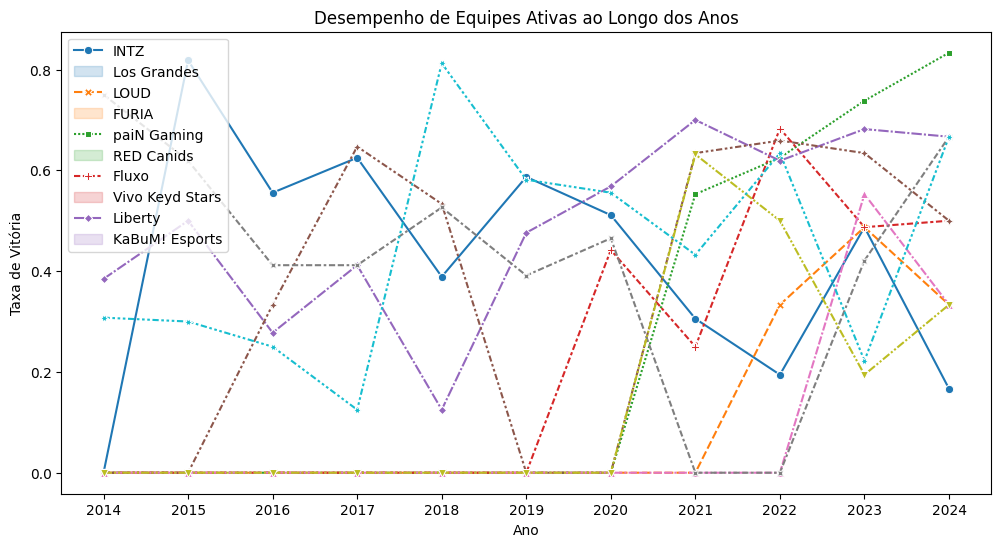

In [36]:
# Atualizando o DataFrame com o status das equipes
temporal_analysis['Status'] = temporal_analysis['Team1'].apply(lambda x: 'Ativa' if x in equipes_ativas else ('Inativa' if x in equipes_inativas else 'Desconhecido'))

# Calculando o desempenho anual novamente, agora considerando o status das equipes
team_yearly_performance = {team: {year: calculate_win_rate(team, year) for year in temporal_analysis['Year'].unique()} for team in teams}

team_yearly_performance_df = pd.DataFrame.from_dict(team_yearly_performance)

# Plotting separate graphs for active and inactive teams
plt.figure(figsize=(12, 6))
sns.lineplot(data=team_yearly_performance_df[equipes_ativas], markers=True)
plt.title("Desempenho de Equipes Ativas ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Taxa de Vitória")
plt.xticks(temporal_analysis['Year'].unique())
plt.legend(equipes_ativas)
plt.show()


In [37]:
team_yearly_performance_df


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KaBuM! Esports,Vivo Keyd Stars,paiN Gaming,CNB e-Sports Club,Team awp,KaBuM! Black,JAYOB e-Sports,INTZ,Dexterity Team,INTZ Red,...,Santos e-Sports,Rensga Esports,Vorax,Cruzeiro eSports,LOUD,Netshoes Miners,Liberty,Los Grandes,Miners,Fluxo
2014,0.307692,0.750000,0.384615,0.416667,0.1,0.0,0.0,0.000000,0.0,0.00,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015,0.300000,0.619048,0.500000,0.400000,0.0,0.2,0.0,0.818182,0.1,0.25,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016,0.250000,0.411765,0.277778,0.388889,0.0,0.0,0.0,0.555556,0.0,0.00,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017,0.125000,0.411765,0.411765,0.200000,0.0,0.0,0.0,0.625000,0.0,0.00,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018,0.812500,0.526316,0.125000,0.555556,0.0,0.0,0.0,0.388889,0.0,0.00,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019,0.581395,0.391304,0.476190,0.386364,0.0,0.0,0.0,0.586957,0.0,0.00,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020,0.555556,0.465116,0.568182,0.000000,0.0,0.0,0.0,0.511111,0.0,0.00,...,0.52381,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021,0.432432,0.000000,0.700000,0.000000,0.0,0.0,0.0,0.305556,0.0,0.00,...,0.00000,0.435897,0.7,0.333333,0.552632,0.277778,0.631579,0.000000,0.000000,0.000000
2022,0.634146,0.000000,0.619048,0.000000,0.0,0.0,0.0,0.194444,0.0,0.00,...,0.00000,0.194444,0.0,0.000000,0.625000,0.526316,0.500000,0.333333,0.421053,0.000000
2023,0.222222,0.421053,0.681818,0.000000,0.0,0.0,0.0,0.487179,0.0,0.00,...,0.00000,0.000000,0.0,0.000000,0.738095,0.000000,0.194444,0.487179,0.000000,0.552632


In [38]:
team_performance_df['jogos'] = team_performance_df[['wins','losses','draws']].sum(axis=1)
team_performance_df['porc_wins'] = team_performance_df['wins']/team_performance_df['jogos']

def verifica_nome(nome):
    if nome in equipes_ativas:
        return 1
    else:
        return 0

team_performance_df['ativo'] = team_performance_df.index.to_series().apply(verifica_nome)

print(team_performance_df.sort_values(by=['ativo','jogos'], ascending=False))

                                 wins  losses  draws  jogos  porc_wins  ativo
INTZ                              133     137     12    282   0.471631      1
KaBuM! Esports                    132     138     11    281   0.469751      1
paiN Gaming                       151      95     27    273   0.553114      1
Vivo Keyd Stars                    95      84     17    196   0.484694      1
RED Canids                        109      66      7    182   0.598901      1
FURIA                              78      87      0    165   0.472727      1
LOUD                               82      44      0    126   0.650794      1
Liberty                            40      59      0     99   0.404040      1
Los Grandes                        27      36      0     63   0.428571      1
Fluxo                              23      21      0     44   0.522727      1
Flamengo Esports                  100      56      0    156   0.641026      0
CNB e-Sports Club                  50      56     21    127   0.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:

team_performance_by_year_df['jogos'] = team_performance_by_year_df[['wins','losses','draws']].sum(axis=1)
team_performance_by_year_df['porc_wins'] = team_performance_by_year_df['wins']/team_performance_by_year_df['jogos']

team_performance_by_year_df['ativo'] = team_performance_by_year_df.index.get_level_values(0).isin(equipes_ativas).astype(int)

print(team_performance_by_year_df.sort_index())

                        wins  losses  draws  jogos  porc_wins  ativo
Big Gods          2015     0       2      0      2   0.000000      0
                  2016     1       4      3      8   0.125000      0
CNB e-Sports Club 2014     5       1      6     12   0.416667      0
                  2015     8       8      4     20   0.400000      0
                  2016     7       5      6     18   0.388889      0
...                      ...     ...    ...    ...        ...    ...
paiN Gaming       2020    25      19      0     44   0.568182      1
                  2021    28      12      0     40   0.700000      1
                  2022    26      16      0     42   0.619048      1
                  2023    30      14      0     44   0.681818      1
                  2024     4       2      0      6   0.666667      1

[125 rows x 6 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
print(team_performance_by_year_df.index.levels[0])

Index(['Big Gods', 'CNB e-Sports Club', 'Cruzeiro eSports', 'Dexterity Team',
       'FURIA', 'Flamengo Esports', 'Fluxo', 'IMP e-Sports', 'INTZ',
       'INTZ Red', 'INTZ.Genesis', 'Ilha da Macacada Gaming',
       'Iron Hawks e-Sports', 'JAYOB e-Sports', 'KaBuM! Black',
       'KaBuM! Esports', 'Keyd Warriors', 'LOUD', 'Liberty', 'Los Grandes',
       'Miners', 'Netshoes Miners', 'Operation Kino e-Sports',
       'Overload (Brazilian Team)', 'ProGaming Esports', 'Prodigy Esports',
       'RED Canids', 'Razer Pichau Gaming', 'Redemption eSports Porto Alegre',
       'Remo Brave e-Sports', 'Rensga Esports', 'Santos Dexterity',
       'Santos e-Sports', 'T Show', 'Team Alocs', 'Team Dioud', 'Team Espeon',
       'Team Genesis', 'Team Loop', 'Team United', 'Team awp',
       'Team oNe eSports', 'Uppercut esports', 'Vivo Keyd Stars', 'Vorax',
       'e-Champ Gaming', 'g3nerationX', 'paiN Gaming'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
MatchData

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,League,Tournament,Date,Team1,Team2,Team1Score,Team2Score,Year,Month,Status
0,CBLOL,Brazilian Champions Series 2014,2014-04-26 16:00:00,KaBuM! Esports,Team United,1,1,2014,4,Ativa
1,CBLOL,Brazilian Champions Series 2014,2014-04-26 18:00:00,Vivo Keyd Stars,Team awp,2,0,2014,4,Ativa
2,CBLOL,Brazilian Champions Series 2014,2014-04-27 14:00:00,paiN Gaming,Team United,0,2,2014,4,Ativa
3,CBLOL,Brazilian Champions Series 2014,2014-04-27 16:00:00,Vivo Keyd Stars,KaBuM! Esports,2,0,2014,4,Ativa
4,CBLOL,Brazilian Champions Series 2014,2014-04-27 18:00:00,CNB e-Sports Club,Team awp,1,1,2014,4,Inativa
...,...,...,...,...,...,...,...,...,...,...
1286,CBLOL,CBLOL 2024 Split 1,2024-02-04 16:00:00,RED Canids,Fluxo,0,1,2024,2,Ativa
1287,CBLOL,CBLOL 2024 Split 1,2024-02-04 17:00:00,KaBuM! Esports,paiN Gaming,0,1,2024,2,Ativa
1288,CBLOL,CBLOL 2024 Split 1,2024-02-04 18:00:00,INTZ,LOUD,0,1,2024,2,Ativa
1289,CBLOL,CBLOL 2024 Split 1,2024-02-04 19:00:00,Los Grandes,FURIA,0,1,2024,2,Ativa


In [42]:
MatchData['Year'] = MatchData['Date'].dt.year
LearningDates = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
PerYearMatchData = dict()

for date in LearningDates:
    PerYearMatchData[date] = MatchData[MatchData['Year'] == date]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
PerYearMatchData

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{2014:    League                            Tournament                Date  \
 0   CBLOL       Brazilian Champions Series 2014 2014-04-26 16:00:00   
 1   CBLOL       Brazilian Champions Series 2014 2014-04-26 18:00:00   
 2   CBLOL       Brazilian Champions Series 2014 2014-04-27 14:00:00   
 3   CBLOL       Brazilian Champions Series 2014 2014-04-27 16:00:00   
 4   CBLOL       Brazilian Champions Series 2014 2014-04-27 18:00:00   
 5   CBLOL       Brazilian Champions Series 2014 2014-04-27 20:00:00   
 6   CBLOL       Brazilian Champions Series 2014 2014-05-07 17:00:00   
 7   CBLOL       Brazilian Champions Series 2014 2014-05-07 19:00:00   
 8   CBLOL       Brazilian Champions Series 2014 2014-05-07 21:00:00   
 9   CBLOL       Brazilian Champions Series 2014 2014-05-07 23:00:00   
 10  CBLOL       Brazilian Champions Series 2014 2014-05-11 15:00:00   
 11  CBLOL       Brazilian Champions Series 2014 2014-05-11 17:00:00   
 12  CBLOL       Brazilian Champions Series 2014 2014-05-1

In [44]:
MatchData

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,League,Tournament,Date,Team1,Team2,Team1Score,Team2Score,Year,Month,Status
0,CBLOL,Brazilian Champions Series 2014,2014-04-26 16:00:00,KaBuM! Esports,Team United,1,1,2014,4,Ativa
1,CBLOL,Brazilian Champions Series 2014,2014-04-26 18:00:00,Vivo Keyd Stars,Team awp,2,0,2014,4,Ativa
2,CBLOL,Brazilian Champions Series 2014,2014-04-27 14:00:00,paiN Gaming,Team United,0,2,2014,4,Ativa
3,CBLOL,Brazilian Champions Series 2014,2014-04-27 16:00:00,Vivo Keyd Stars,KaBuM! Esports,2,0,2014,4,Ativa
4,CBLOL,Brazilian Champions Series 2014,2014-04-27 18:00:00,CNB e-Sports Club,Team awp,1,1,2014,4,Inativa
...,...,...,...,...,...,...,...,...,...,...
1286,CBLOL,CBLOL 2024 Split 1,2024-02-04 16:00:00,RED Canids,Fluxo,0,1,2024,2,Ativa
1287,CBLOL,CBLOL 2024 Split 1,2024-02-04 17:00:00,KaBuM! Esports,paiN Gaming,0,1,2024,2,Ativa
1288,CBLOL,CBLOL 2024 Split 1,2024-02-04 18:00:00,INTZ,LOUD,0,1,2024,2,Ativa
1289,CBLOL,CBLOL 2024 Split 1,2024-02-04 19:00:00,Los Grandes,FURIA,0,1,2024,2,Ativa


In [45]:
response = site.cargo_client.query(
                      tables = "Tournaments=T, Leagues=L, MatchSchedule=M",
                      fields="M.Team1Final=Team1, M.Team2Final=Team2, M.DateTime_UTC=Date, M.Team1Score, M.Team2Score, M.Tab",
                      where = 'L.League_Short = "'+league+'"',
                      join_on = "T.League = L.League, T.OverviewPage=M.OverviewPage")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
CBLOLData = pd.DataFrame(response)

# Convertendo a coluna 'Date' para datetime e extraindo o ano
CBLOLData['Date'] = pd.to_datetime(CBLOLData['Date'])
CBLOLData['Year'] = CBLOLData['Date'].dt.year

# Agrupando os dados por ano e armazenando em um dicionário
matches_by_year = {year: grp for year, grp in CBLOLData.groupby('Year')}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
matches_by_year

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{2014.0:                   Team1              Team2                Date Team1Score  \
 28    CNB e-Sports Club     KaBuM! Esports 2014-05-11 21:00:00          2   
 29    CNB e-Sports Club     KaBuM! Esports 2014-05-25 17:00:00          2   
 30    CNB e-Sports Club     KaBuM! Esports 2014-06-08 13:00:00          2   
 45    CNB e-Sports Club        paiN Gaming 2014-05-07 23:00:00          1   
 46    CNB e-Sports Club        paiN Gaming 2014-05-21 17:00:00          1   
 47    CNB e-Sports Club        paiN Gaming 2014-06-07 17:00:00          0   
 62    CNB e-Sports Club           Team awp 2014-04-27 18:00:00          1   
 63    CNB e-Sports Club           Team awp 2014-05-18 17:00:00          1   
 68    CNB e-Sports Club        Team United 2014-05-11 15:00:00          2   
 69    CNB e-Sports Club        Team United 2014-05-14 21:00:00          2   
 585      KaBuM! Esports           Team awp 2014-05-14 19:00:00          2   
 586      KaBuM! Esports           Team awp 2014-05-21 1

In [48]:
league = 'CBLOL'
response = site.cargo_client.query(
                      tables = "Tournaments=T, Leagues=L, MatchSchedule=M",
                      fields="M.Team1Final=Team1, M.Team2Final=Team2, M.DateTime_UTC=Date",
                      where = 'L.League_Short = "'+league+'"',
                      join_on = "T.League = L.League, T.OverviewPage=M.OverviewPage")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
TeamsData = pd.DataFrame(response)
TeamsData['Date'] = pd.to_datetime(TeamsData['Date'])

# Criar a coluna 'Year' a partir da coluna 'Date'
TeamsData['Year'] = TeamsData['Date'].dt.year

# Preencher valores None com uma string padrão antes de combinar as colunas
TeamsData['Team1'].fillna('Unknown Team', inplace=True)
TeamsData['Team2'].fillna('Unknown Team', inplace=True)

# Remover linhas onde 'Team1' ou 'Team2' são nulos
TeamsData.dropna(subset=['Team1', 'Team2'], inplace=True)

unique_teams_by_year = {}

for year in TeamsData['Year'].unique():
    # Filtrar o DataFrame pelo ano
    year_df = TeamsData[TeamsData['Year'] == year]

    # Combinar as colunas 'Team1' e 'Team2' e remover duplicatas
    unique_teams = pd.concat([year_df['Team1'], year_df['Team2']]).unique()

    # Adicionar a lista de times únicos ao dicionário com o ano como chave
    unique_teams_by_year[year] = unique_teams


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
data_for_df = [(year, team) for year, teams in unique_teams_by_year.items() for team in teams]

# Transformar a lista de tuplas em um DataFrame
teams_df = pd.DataFrame(data_for_df, columns=['Year', 'Team'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
teams_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Team
0,2016.0,Big Gods
1,2016.0,CNB e-Sports Club
2,2016.0,g3nerationX
3,2016.0,INTZ
4,2016.0,KaBuM! Esports
...,...,...
121,2024.0,Los Grandes
122,2024.0,LOUD
123,2024.0,paiN Gaming
124,2024.0,RED Canids


In [52]:
def who_won(row):
    if row["Team1Score"] > row["Team2Score"]:
        return row["Team1"]
    else:
        return row["Team2"]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
# Inicializa um dicionário para armazenar as partidas de play-off finais organizadas por ano
FinalPlayOffByYear = dict()

playoff_phases = ['Quarterfinals', 'Semifinals', 'Finals']

for year, matches in matches_by_year.items():
    # Inicializa uma lista para coletar DataFrames das fases de play-offs
    phases_dataframes = []

    for phase in playoff_phases:
        phase_matches = matches[matches['Tab'] == phase]

        if not phase_matches.empty:
            # Calcula o vencedor para cada partida
            phase_matches["Winner"] = phase_matches.apply(who_won, axis=1)
            # Adiciona o DataFrame da fase atual à lista
            phases_dataframes.append(phase_matches)

    # Combina todos os DataFrames das fases em um único DataFrame por ano
    if phases_dataframes:
        FinalPlayOffByYear[year] = pd.concat(phases_dataframes, ignore_index=True)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-53-10166dab50ea>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phase_matches["Winner"] = phase_matches.apply(who_won, axis=1)
<ipython-input-53-10166dab50ea>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [54]:
matches_by_year

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{2014.0:                   Team1              Team2                Date Team1Score  \
 28    CNB e-Sports Club     KaBuM! Esports 2014-05-11 21:00:00          2   
 29    CNB e-Sports Club     KaBuM! Esports 2014-05-25 17:00:00          2   
 30    CNB e-Sports Club     KaBuM! Esports 2014-06-08 13:00:00          2   
 45    CNB e-Sports Club        paiN Gaming 2014-05-07 23:00:00          1   
 46    CNB e-Sports Club        paiN Gaming 2014-05-21 17:00:00          1   
 47    CNB e-Sports Club        paiN Gaming 2014-06-07 17:00:00          0   
 62    CNB e-Sports Club           Team awp 2014-04-27 18:00:00          1   
 63    CNB e-Sports Club           Team awp 2014-05-18 17:00:00          1   
 68    CNB e-Sports Club        Team United 2014-05-11 15:00:00          2   
 69    CNB e-Sports Club        Team United 2014-05-14 21:00:00          2   
 585      KaBuM! Esports           Team awp 2014-05-14 19:00:00          2   
 586      KaBuM! Esports           Team awp 2014-05-21 1

In [55]:
FinalPlayOffByYear

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{2014.0:                Team1           Team2                Date Team1Score  \
 0  CNB e-Sports Club     paiN Gaming 2014-06-07 17:00:00          0   
 1         Keyd Stars  KaBuM! Esports 2014-06-07 14:00:00          2   
 2         Keyd Stars     paiN Gaming 2014-06-08 17:00:00          3   
 
   Team2Score         Tab Date__precision    Year       Winner  
 0          2  Semifinals               0  2014.0  paiN Gaming  
 1          0  Semifinals               0  2014.0   Keyd Stars  
 2          2      Finals               0  2014.0   Keyd Stars  ,
 2015.0:                 Team1              Team2                Date Team1Score  \
 0   CNB e-Sports Club        g3nerationX 2015-07-11 16:00:00          1   
 1   CNB e-Sports Club           INTZ Red 2015-11-13 18:00:00          2   
 2   CNB e-Sports Club       KaBuM! Black 2015-03-21 19:00:00          0   
 3         g3nerationX      KaBuM! Orange 2015-11-13 15:00:00          1   
 4                INTZ           Big Gods 2015-11-12 

In [56]:
import numpy as np

class EloRating:
    def __init__(self, K, D, starting_elo=0):
        self.K = max(K, 1)  # Maximum Elo variation
        self.D = D  # Elo degradation constant
        self.start = starting_elo

    def RealElo(self, Rating):
        return Rating * 400

    def E(self, RatingA, RatingB):
        diff = RatingB - RatingA
        diff = max(min(diff, 10), -10)  # Prevenção do overflow
        return 1 / (1 + 10 ** (diff / 400))

    def updateRating(self, RatingA, RatingB, ScoreA):
        E_A = self.E(RatingA, RatingB)
        return RatingA + self.K * (ScoreA - E_A)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
import copy
class FloatArrayGene:
    def __init__(self, distributions):
        self.dists = distributions
        self.genes = np.array([dist['fun'](*dist['args']) for dist in distributions])

class Mutation:
    def __init__(self):
        pass
    def mutate(self, gene, **kwargs):
        return gene

class MirrorMutation(Mutation):
    def __init__(self, mid):  # mid agora é um array com três elementos
        self.midPoint = np.array(mid)  # Certifique-se que isso corresponde ao número de genes

    def mutate(self, gene, mp=0.5, di=2):
        select = np.random.rand(len(gene.genes)) < mp
        new_gene = copy.deepcopy(gene)
        for i in range(len(gene.genes)):
            if select[i]:
                deviation = di * np.random.rand() * (new_gene.genes[i] - self.midPoint[i])
                new_gene.genes[i] = self.midPoint[i] - deviation
        return new_gene



class Crossover:
    def __init__(self):
        pass
    def mutate(self,geneA, geneB, **kwargs):
        return geneA

class GeneFlipCrossover(Crossover):
    def cross(self, geneA, geneB, cxp=0.5):
        select = np.random.rand(len(geneA.genes)) < cxp
        new_gene_A = copy.deepcopy(geneA)
        for i in range(len(geneA.genes)):
            if select[i]:
                new_gene_A.genes[i] = geneB.genes[i]
        return new_gene_A

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
import numpy as np
elo_gene_distr = [
    {'fun': np.random.uniform, 'args': [1, 500]},  # Para K
    {'fun': np.random.normal, 'args': [400, 80]},  # Para C
    {'fun': np.random.normal, 'args': [1, 0.1]}    # Para D
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
from collections import defaultdict

def calculate_elo_ratings(match_data):
    elo_model = EloRating(K=32, D=400)  # Exemplo de configuração
    ratings = defaultdict(lambda: elo_model.start)

    for index, row in match_data.iterrows():
        Team1, Team2 = row["Team1"], row["Team2"]
        Team1Score, Team2Score = row["Team1Score"], row["Team2Score"]

        # Calcular o score normalizado para a partida
        total_scores = Team1Score + Team2Score
        ScoreA = Team1Score / total_scores if total_scores > 0 else 0.5

        # Atualizar ratings
        ratings[Team1] = elo_model.updateRating(ratings[Team1], ratings[Team2], ScoreA)
        ratings[Team2] = elo_model.updateRating(ratings[Team2], ratings[Team1], 1 - ScoreA)

    return ratings

# Calcular ratings Elo
elo_ratings = calculate_elo_ratings(MatchData)

# Converter o dicionário de ratings para um DataFrame para visualização
elo_ratings_df = pd.DataFrame(list(elo_ratings.items()), columns=['Team', 'Elo'])
elo_ratings_df.sort_values(by='Elo', ascending=False, inplace=True)
print(elo_ratings_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                               Team         Elo
4                       paiN Gaming  856.149475
31                 Flamengo Esports  646.574535
21                       RED Canids  625.361667
39                             LOUD  588.017290
2                   Vivo Keyd Stars  138.872217
42                            Vorax  131.579064
47                            Fluxo   48.234734
36                  Prodigy Esports   38.928578
17                       Team Alocs   20.894145
38                  Santos e-Sports   20.837102
10                    Keyd Warriors   15.539610
18                      Team Espeon   10.892035
26                     INTZ.Genesis    2.739610
25                     Team Genesis   -8.460390
24                   e-Champ Gaming   -8.460390
11                     IMP e-Sports   -8.460390
33              Razer Pichau Gaming   -9.745887
34                 Uppercut esports  -13.926269
32          Ilha da Macacada Gaming  -15.181090
30              Iron Hawks e-Sports  -15

In [60]:
import pandas as pd
import numpy as np

def Score(row):
    return row["Team1Score"]/(row["Team1Score"]+row["Team2Score"])


def WhoWonElo(row):
    if row["Team1Elo"]>row["Team2Elo"]: return row["Team1"]
    else: return row["Team2"]

class EvaluateElo:
    def __init__(self, matchData, teams_df, FinalPlayOffByYear):
        self.matches = matchData.sort_values(by="Date")
        self.matches["NormScore"] = self.matches.apply(Score, axis=1)
        self.playoff = FinalPlayOffByYear
        self.teams = teams_df

    def evaluate(self, EloModel):
        Rating = defaultdict(lambda: EloModel.start)
        # Calculating Elo ratings for each match
        for index, row in self.matches.iterrows():
            Team1, Team2 = row["Team1"], row["Team2"]
            NormScore = row["NormScore"]
            Rating[Team1] = EloModel.updateRating(Rating[Team1], Rating[Team2], NormScore)
            Rating[Team2] = EloModel.updateRating(Rating[Team2], Rating[Team1], 1 - NormScore)

        self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
        print(self.teams.head())


        score = 0

        # Itera diretamente sobre os DataFrames de play-offs de cada ano
        self.playoff["Team1Elo"] = self.playoff["Team1"].apply(lambda x: Rating.get(x, EloModel.start))
        self.playoff["Team2Elo"] = self.playoff["Team2"].apply(lambda x: Rating.get(x, EloModel.start))
        self.playoff["RealWinner"] = self.playoff.apply(who_won,axis=1)
        self.playoff["ExpectedWinner"] = self.playoff.apply(WhoWonElo,axis=1)
        value = {"Quarterfinals":5,"Semifinals":10,"Finals":20}
        self.playoff["Value"] = self.playoff["Tab"].apply(lambda x: value[x])
        score+=self.playoff["Value"][self.playoff["RealWinner"]==self.playoff["ExpectedWinner"]].sum()
        return score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
FinalPlayOffByYear[2020]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Team1,Team2,Date,Team1Score,Team2Score,Tab,Date__precision,Year,Winner
0,Flamengo Esports,FURIA Uppercut,2020-05-03 16:00:00,3,0,Semifinals,0,2020.0,Flamengo Esports
1,INTZ,KaBuM! Esports,2020-08-23 16:00:00,3,2,Semifinals,0,2020.0,INTZ
2,paiN Gaming,Prodigy Esports,2020-08-22 16:00:00,3,2,Semifinals,0,2020.0,paiN Gaming
3,Vivo Keyd,KaBuM! Esports,2020-05-02 16:00:00,0,3,Semifinals,0,2020.0,KaBuM! Esports
4,KaBuM! Esports,Flamengo Esports,2020-05-09 16:00:00,3,0,Finals,0,2020.0,KaBuM! Esports
5,paiN Gaming,INTZ,2020-09-05 20:00:00,1,3,Finals,0,2020.0,INTZ


In [62]:
teams_df[teams_df['Year'] == 2020]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Team
83,2020.0,Flamengo Esports
84,2020.0,FURIA
85,2020.0,FURIA Uppercut
86,2020.0,INTZ
87,2020.0,KaBuM! Esports
88,2020.0,paiN Gaming
89,2020.0,Prodigy Esports
90,2020.0,Redemption eSports Porto Alegre
91,2020.0,Santos e-Sports
92,2020.0,Vivo Keyd


In [63]:
class LoLEloFitnessEvaluation:
    def __init__ (self, matchData, teams_df, FinalPlayOffByYear, years):
        self.raters = [ EvaluateElo(matchData[year], teams_df[teams_df['Year'] == year], FinalPlayOffByYear[year]) for year in years]
    def evaluate(self, individual):
        eloModel = EloRating(individual.genes[0], individual.genes[1:-1], individual.genes[-1])
        return np.sum([rater.evaluate(eloModel) for rater in self.raters])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
class EliteSelection:
    def __init__(self):
        pass
    def select(self, fitnesses, n):
        return np.argsort(fitnesses)[::-1][0:n]

class RouletteWheelSelection:
    def __init__(self):
        pass
    def select(self, fitnesses, n):
        weights = np.divide (fitnesses,np.sum(fitnesses))
        return np.random.choice(np.arange(0,len(fitnesses)),size=n, p=weights)

class AdaptiveGeneticAlgorithm:
    def __init__ (self, PopulationGene, SurvivingSelection, ParentsSelection, Mutation, Crossover, FitnessEvaluator):
        self.PopulationGene = PopulationGene
        self.SurvivingSelection = SurvivingSelection
        self.ParentsSelection = ParentsSelection
        self.Mutation = Mutation
        self.Crossover = Crossover
        self.Fitness = FitnessEvaluator

    def evolve(self, total_population, generations=10, adaptiveMutationCrossover=True, startingMutationProb = 0.5, startingCrossoverProb = 1.0):
        #Initialize individuals
        individuals = np.array([self.PopulationGene() for i in range(total_population)])
        mutation = startingMutationProb
        crossover = startingCrossoverProb

        #Calculate fitnesses
        print("evaluating Starting Pop fitness")
        fitnesses = np.array([self.Fitness.evaluate(individual) for individual in individuals])
        order = np.argsort(fitnesses)[::-1]
        fitnesses = fitnesses[order]
        individuals = individuals[order]
        self.best_individual = individuals[0]
        self.best_fitness = fitnesses[0]
        fitness_historical = np.array(self.best_fitness)
        n_gen=0

        while(n_gen<generations):
            print("Generation "+str(n_gen)+" Best Fitness "+str(self.best_fitness))
            new_individuals_mutation = int(total_population*mutation)
            new_individuals_crossover = int(total_population*crossover)
            new_individuals = np.zeros(new_individuals_crossover + new_individuals_mutation, dtype=object)
            parents = self.ParentsSelection.select(fitnesses, new_individuals_mutation+2*new_individuals_crossover)

            #Create individuals using Mutation
            new_individuals[0:new_individuals_mutation] = [
                self.Mutation.mutate(individuals[parents[i]]) for i in range(new_individuals_mutation)]

            #Create individuals using Crossover
            new_individuals[new_individuals_mutation:] = [
                self.Crossover.cross(individuals[parents[new_individuals_mutation+2*i]],
                                     individuals[parents[new_individuals_mutation+2*i+1]]) for i in range(new_individuals_crossover)]
            #Calculate fitnesses
            print("evaluating New Pop fitness")
            new_fitnesses = np.array([self.Fitness.evaluate(individual) for individual in new_individuals])

            #Select survivors
            individuals = np.append(individuals, new_individuals)
            fitnesses = np.append(fitnesses, new_fitnesses)
            select = self.SurvivingSelection.select(fitnesses, total_population)
            fitnesses = fitnesses[select]
            individuals = individuals[select]
            if(fitnesses[0]>self.best_fitness):

                self.best_individual = individuals[0]
                self.best_fitness = fitnesses[0]
            fitness_historical=np.append(fitness_historical, self.best_fitness)
            if(adaptiveMutationCrossover):
                non_stagnation = self.best_fitness/np.mean(fitness_historical[::-1][0:5])
                mutation = startingMutationProb + non_stagnation*(startingCrossoverProb-startingMutationProb)
                crossover = startingCrossoverProb - non_stagnation*(startingCrossoverProb-startingMutationProb)
            n_gen+=1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
# Inicializando MirrorMutation com um midPoint que reflete o novo setup de genes
mirrorMutation = MirrorMutation(np.array([50, 400, 1]))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
aga = AdaptiveGeneticAlgorithm(
    lambda: FloatArrayGene(elo_gene_distr),
    EliteSelection(),
    RouletteWheelSelection(),
    mirrorMutation,
    GeneFlipCrossover(),
    LoLEloFitnessEvaluation(PerYearMatchData, teams_df, FinalPlayOffByYear, [2017, 2018, 2019, 2020])  # Ajuste conforme necessário
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
aga.evolve(20, generations=2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

evaluating Starting Pop fitness
      Year                     Team         Elo
41  2017.0        CNB e-Sports Club -183.586195
42  2017.0                     INTZ  330.373205
43  2017.0           KaBuM! Esports -199.387304
44  2017.0               Keyd Stars    0.847327
45  2017.0  Operation Kino e-Sports -197.172942
      Year                     Team         Elo
54  2018.0        CNB e-Sports Club  -34.818675
55  2018.0         Flamengo Esports  159.283952
56  2018.0  Ilha da Macacada Gaming  -46.349950
57  2018.0                     INTZ -105.262048
58  2018.0           KaBuM! Esports  358.230220


<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year               Team          Elo
31  2019.0  CNB e-Sports Club  -425.629847
32  2019.0   Flamengo Esports  1497.104975
33  2019.0               INTZ   304.112710
34  2019.0     KaBuM! Esports   381.745112
35  2019.0        paiN Gaming   -46.480356
      Year              Team         Elo
83  2020.0  Flamengo Esports  150.835499
84  2020.0             FURIA -223.171553
85  2020.0    FURIA Uppercut    0.847327
86  2020.0              INTZ  -10.056529
87  2020.0    KaBuM! Esports  277.559503
      Year                     Team         Elo
41  2017.0        CNB e-Sports Club -276.914436
42  2017.0                     INTZ  496.632063
43  2017.0           KaBuM! Esports -299.994648
44  2017.0               Keyd Stars    1.075474
45  2017.0  Operation Kino e-Sports -297.110827


<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year                     Team         Elo
54  2018.0        CNB e-Sports Club  -52.587386
55  2018.0         Flamengo Esports  239.260672
56  2018.0  Ilha da Macacada Gaming  -70.133485
57  2018.0                     INTZ -158.576079
58  2018.0           KaBuM! Esports  538.888570
      Year               Team          Elo
31  2019.0  CNB e-Sports Club  -640.599623
32  2019.0   Flamengo Esports  2252.336103
33  2019.0               INTZ   456.759206
34  2019.0     KaBuM! Esports   574.172085
35  2019.0        paiN Gaming   -70.133485
      Year              Team         Elo
83  2020.0  Flamengo Esports  226.573932
84  2020.0             FURIA -335.982041
85  2020.0    FURIA Uppercut    1.075474
86  2020.0              INTZ  -14.754810
87  2020.0    KaBuM! Esports  416.994529


<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year                     Team          Elo
41  2017.0        CNB e-Sports Club  -945.879119
42  2017.0                     INTZ  1672.597229
43  2017.0           KaBuM! Esports -1011.770455
44  2017.0               Keyd Stars     0.889109
45  2017.0  Operation Kino e-Sports -1011.184020
      Year                     Team          Elo
54  2018.0        CNB e-Sports Club  -180.554254
55  2018.0         Flamengo Esports   809.058119
56  2018.0  Ilha da Macacada Gaming  -239.880632
57  2018.0                     INTZ  -538.920255
58  2018.0           KaBuM! Esports  1819.598213
      Year               Team          Elo
31  2019.0  CNB e-Sports Club -2168.724775
32  2019.0   Flamengo Esports  7612.788554
33  2019.0               INTZ  1540.573880
34  2019.0     KaBuM! Esports  1938.627332
35  2019.0        paiN Gaming  -239.880632


<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year              Team          Elo
83  2020.0  Flamengo Esports   764.237017
84  2020.0             FURIA -1138.760329
85  2020.0    FURIA Uppercut     0.889109
86  2020.0              INTZ   -50.673370
87  2020.0    KaBuM! Esports  1403.060210
      Year                     Team          Elo
41  2017.0        CNB e-Sports Club  -609.265925
42  2017.0                     INTZ  1082.073461
43  2017.0           KaBuM! Esports  -654.699808
44  2017.0               Keyd Stars     1.061183
45  2017.0  Operation Kino e-Sports  -651.855305
      Year                     Team          Elo
54  2018.0        CNB e-Sports Club  -116.165162
55  2018.0         Flamengo Esports   522.462927
56  2018.0  Ilha da Macacada Gaming  -154.494558
57  2018.0                     INTZ  -347.697116
58  2018.0           KaBuM! Esports  1176.289928
      Year               Team          Elo
31  2019.0  CNB e-Sports Club -1400.675983
32  2019.0   Flamengo Esports  4918.932717
33  2019.0               INTZ  

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year              Team         Elo
83  2020.0  Flamengo Esports  493.881986
84  2020.0             FURIA -735.239864
85  2020.0    FURIA Uppercut    1.061183
86  2020.0              INTZ  -32.252138
87  2020.0    KaBuM! Esports  907.331943
      Year                     Team          Elo
41  2017.0        CNB e-Sports Club  -576.430542
42  2017.0                     INTZ  1023.731138
43  2017.0           KaBuM! Esports  -619.862230
44  2017.0               Keyd Stars     0.799115
45  2017.0  Operation Kino e-Sports  -616.846321
      Year                     Team          Elo
54  2018.0        CNB e-Sports Club  -110.115994
55  2018.0         Flamengo Esports   494.061035
56  2018.0  Ilha da Macacada Gaming  -146.381811
57  2018.0                     INTZ  -329.182725
58  2018.0           KaBuM! Esports  1112.744737
      Year               Team          Elo
31  2019.0  CNB e-Sports Club -1325.471285
32  2019.0   Flamengo Esports  4653.902141
33  2019.0               INTZ   941.9

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))


      Year              Team         Elo
83  2020.0  Flamengo Esports  466.871117
84  2020.0             FURIA -695.860935
85  2020.0    FURIA Uppercut    0.799115
86  2020.0              INTZ  -30.720682
87  2020.0    KaBuM! Esports  858.494345
      Year                     Team          Elo
41  2017.0        CNB e-Sports Club  -890.125054
42  2017.0                     INTZ  1575.280488
43  2017.0           KaBuM! Esports  -952.447075
44  2017.0               Keyd Stars     1.056154
45  2017.0  Operation Kino e-Sports  -951.722839
      Year                     Team          Elo
54  2018.0        CNB e-Sports Club  -169.787867
55  2018.0         Flamengo Esports   761.837118
56  2018.0  Ilha da Macacada Gaming  -225.648588
57  2018.0                     INTZ  -507.219272
58  2018.0           KaBuM! Esports  1713.629905


<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year               Team          Elo
31  2019.0  CNB e-Sports Club -2041.815821
32  2019.0   Flamengo Esports  7168.292764
33  2019.0               INTZ  1450.797462
34  2019.0     KaBuM! Esports  1825.597903
35  2019.0        paiN Gaming  -225.648588
      Year              Team          Elo
83  2020.0  Flamengo Esports   719.811717
84  2020.0             FURIA -1072.018606
85  2020.0    FURIA Uppercut     1.056154
86  2020.0              INTZ   -47.494210
87  2020.0    KaBuM! Esports  1321.316902
      Year                     Team         Elo
41  2017.0        CNB e-Sports Club -459.644928
42  2017.0                     INTZ  819.045410
43  2017.0           KaBuM! Esports -495.646876
44  2017.0               Keyd Stars    1.012147
45  2017.0  Operation Kino e-Sports -492.321211


<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year                     Team         Elo
54  2018.0        CNB e-Sports Club  -87.645887
55  2018.0         Flamengo Esports  395.099023
56  2018.0  Ilha da Macacada Gaming -116.634327
57  2018.0                     INTZ -262.753010
58  2018.0           KaBuM! Esports  889.760612
      Year               Team          Elo
31  2019.0  CNB e-Sports Club -1059.118677
32  2019.0   Flamengo Esports  3720.387883
33  2019.0               INTZ   753.342918
34  2019.0     KaBuM! Esports   947.842380
35  2019.0        paiN Gaming  -116.634327
      Year              Team         Elo
83  2020.0  Flamengo Esports  372.948744
84  2020.0             FURIA -555.850762
85  2020.0    FURIA Uppercut    1.012147
86  2020.0              INTZ  -24.182646
87  2020.0    KaBuM! Esports  687.205510
      Year                     Team          Elo
41  2017.0        CNB e-Sports Club  -724.112205
42  2017.0                     INTZ  1283.389012
43  2017.0           KaBuM! Esports  -776.385950
44  2017.0  

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year                     Team          Elo
54  2018.0        CNB e-Sports Club  -138.203010
55  2018.0         Flamengo Esports   620.013628
56  2018.0  Ilha da Macacada Gaming  -183.692000
57  2018.0                     INTZ  -412.983093
58  2018.0           KaBuM! Esports  1395.667479
      Year               Team          Elo
31  2019.0  CNB e-Sports Club -1662.649127
32  2019.0   Flamengo Esports  5837.406756
33  2019.0               INTZ  1181.486157
34  2019.0     KaBuM! Esports  1486.696919
35  2019.0        paiN Gaming  -183.692000
      Year              Team          Elo
83  2020.0  Flamengo Esports   586.223476
84  2020.0             FURIA  -872.915408
85  2020.0    FURIA Uppercut     0.920182
86  2020.0              INTZ   -38.615774
87  2020.0    KaBuM! Esports  1076.046419
      Year                     Team          Elo
41  2017.0        CNB e-Sports Club  -811.229301
42  2017.0                     INTZ  1436.469089
43  2017.0           KaBuM! Esports  -868.490487


<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year               Team          Elo
31  2019.0  CNB e-Sports Club -1861.631455
32  2019.0   Flamengo Esports  6535.565832
33  2019.0               INTZ  1322.713497
34  2019.0     KaBuM! Esports  1664.432948
35  2019.0        paiN Gaming  -205.764489
      Year              Team          Elo
83  2020.0  Flamengo Esports   656.246707
84  2020.0             FURIA  -977.431398
85  2020.0    FURIA Uppercut     0.930625
86  2020.0              INTZ   -43.334541
87  2020.0    KaBuM! Esports  1204.661272
      Year                     Team         Elo
41  2017.0        CNB e-Sports Club -285.011088
42  2017.0                     INTZ  510.527570
43  2017.0           KaBuM! Esports -308.687416
44  2017.0               Keyd Stars    0.915694
45  2017.0  Operation Kino e-Sports -305.760695
      Year                     Team         Elo
54  2018.0        CNB e-Sports Club  -54.271400
55  2018.0         Flamengo Esports  245.878208
56  2018.0  Ilha da Macacada Gaming  -72.315876
57  2018.0

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year                     Team          Elo
41  2017.0        CNB e-Sports Club  -577.315577
42  2017.0                     INTZ  1025.781823
43  2017.0           KaBuM! Esports  -620.812437
44  2017.0               Keyd Stars     0.979536
45  2017.0  Operation Kino e-Sports  -617.801472
      Year                     Team          Elo
54  2018.0        CNB e-Sports Club  -110.138790
55  2018.0         Flamengo Esports   495.147413
56  2018.0  Ilha da Macacada Gaming  -146.471053
57  2018.0                     INTZ  -329.606891
58  2018.0           KaBuM! Esports  1114.962885
      Year               Team          Elo
31  2019.0  CNB e-Sports Club -1327.720833
32  2019.0   Flamengo Esports  4662.607890
33  2019.0               INTZ   943.902946
34  2019.0     KaBuM! Esports  1187.676168
35  2019.0        paiN Gaming  -146.471053
      Year              Team         Elo
83  2020.0  Flamengo Esports  467.912443
84  2020.0             FURIA -696.956922
85  2020.0    FURIA Uppercut   

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year               Team          Elo
31  2019.0  CNB e-Sports Club  -816.078828
32  2019.0   Flamengo Esports  2867.345470
33  2019.0               INTZ   580.731699
34  2019.0     KaBuM! Esports   730.626681
35  2019.0        paiN Gaming   -89.734024
      Year              Team         Elo
83  2020.0  Flamengo Esports  287.789265
84  2020.0             FURIA -428.225135
85  2020.0    FURIA Uppercut    0.932633
86  2020.0              INTZ  -18.566696
87  2020.0    KaBuM! Esports  530.190964
      Year                     Team         Elo
41  2017.0        CNB e-Sports Club -311.806987
42  2017.0                     INTZ  558.027974
43  2017.0           KaBuM! Esports -337.473965
44  2017.0               Keyd Stars    0.944618
45  2017.0  Operation Kino e-Sports -334.418257
      Year                     Team         Elo
54  2018.0        CNB e-Sports Club  -59.391315
55  2018.0         Flamengo Esports  268.809465
56  2018.0  Ilha da Macacada Gaming  -79.119302
57  2018.0      

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year                     Team         Elo
41  2017.0        CNB e-Sports Club -552.233039
42  2017.0                     INTZ  982.233523
43  2017.0           KaBuM! Esports -594.193883
44  2017.0               Keyd Stars    1.157884
45  2017.0  Operation Kino e-Sports -591.077351
      Year                     Team          Elo
54  2018.0        CNB e-Sports Club  -105.209510
55  2018.0         Flamengo Esports   474.147798
56  2018.0  Ilha da Macacada Gaming  -139.988364
57  2018.0                     INTZ  -315.294116
58  2018.0           KaBuM! Esports  1067.500881
      Year               Team          Elo
31  2019.0  CNB e-Sports Club -1270.733079
32  2019.0   Flamengo Esports  4463.475435
33  2019.0               INTZ   903.766020
34  2019.0     KaBuM! Esports  1137.116568
35  2019.0        paiN Gaming  -139.988364
      Year              Team         Elo
83  2020.0  Flamengo Esports  447.970627
84  2020.0             FURIA -666.937869
85  2020.0    FURIA Uppercut    1.157

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year               Team         Elo
31  2019.0  CNB e-Sports Club  -41.565307
32  2019.0   Flamengo Esports  151.082328
33  2019.0               INTZ   31.507811
34  2019.0     KaBuM! Esports   38.681886
35  2019.0        paiN Gaming   -3.517199
      Year              Team        Elo
83  2020.0  Flamengo Esports  16.354439
84  2020.0             FURIA -21.295995
85  2020.0    FURIA Uppercut   0.994414
86  2020.0              INTZ  -0.131197
87  2020.0    KaBuM! Esports  29.046611
      Year                     Team          Elo
41  2017.0        CNB e-Sports Club  -929.735250
42  2017.0                     INTZ  1643.983129
43  2017.0           KaBuM! Esports  -994.586598
44  2017.0               Keyd Stars     0.777135
45  2017.0  Operation Kino e-Sports  -993.960183
      Year                     Team          Elo
54  2018.0        CNB e-Sports Club  -177.567246
55  2018.0         Flamengo Esports   795.088791
56  2018.0  Ilha da Macacada Gaming  -235.880353
57  2018.0        

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Generation 0 Best Fitness 170
evaluating New Pop fitness
      Year                     Team       Elo
41  2017.0        CNB e-Sports Club -0.958553
42  2017.0                     INTZ  4.482960
43  2017.0           KaBuM! Esports -1.075661
44  2017.0               Keyd Stars  1.012147
45  2017.0  Operation Kino e-Sports -1.075507
      Year                     Team       Elo
54  2018.0        CNB e-Sports Club  0.561284
55  2018.0         Flamengo Esports  2.677235
56  2018.0  Ilha da Macacada Gaming  0.519674
57  2018.0                     INTZ -0.287935
58  2018.0           KaBuM! Esports  4.843214
      Year               Team        Elo
31  2019.0  CNB e-Sports Club  -3.565678
32  2019.0   Flamengo Esports  16.520909
33  2019.0               INTZ   4.326017
34  2019.0     KaBuM! Esports   4.799566
35  2019.0        paiN Gaming   0.556677
      Year              Team       Elo
83  2020.0  Flamengo Esports  2.895266
84  2020.0             FURIA -1.423196
85  2020.0    FURIA Uppercut

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year                     Team          Elo
54  2018.0        CNB e-Sports Club  -109.767608
55  2018.0         Flamengo Esports   494.409421
56  2018.0  Ilha da Macacada Gaming  -146.033425
57  2018.0                     INTZ  -328.834339
58  2018.0           KaBuM! Esports  1113.093122
      Year               Team          Elo
31  2019.0  CNB e-Sports Club -1325.122900
32  2019.0   Flamengo Esports  4654.250527
33  2019.0               INTZ   942.346464
34  2019.0     KaBuM! Esports  1185.673867
35  2019.0        paiN Gaming  -146.033425
      Year              Team         Elo
83  2020.0  Flamengo Esports  467.219502
84  2020.0             FURIA -695.512549
85  2020.0    FURIA Uppercut    1.147501
86  2020.0              INTZ  -30.372296
87  2020.0    KaBuM! Esports  858.842731
      Year                     Team          Elo
41  2017.0        CNB e-Sports Club  -890.280995
42  2017.0                     INTZ  1575.124546
43  2017.0           KaBuM! Esports  -952.603016
44  20

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year                     Team         Elo
54  2018.0        CNB e-Sports Club  -19.291432
55  2018.0         Flamengo Esports   91.469885
56  2018.0  Ilha da Macacada Gaming  -25.278093
57  2018.0                     INTZ  -59.387449
58  2018.0           KaBuM! Esports  204.383347
      Year               Team         Elo
31  2019.0  CNB e-Sports Club -241.730172
32  2019.0   Flamengo Esports  852.636474
33  2019.0               INTZ  173.813177
34  2019.0     KaBuM! Esports  217.543225
35  2019.0        paiN Gaming  -25.717402
      Year              Team         Elo
83  2020.0  Flamengo Esports   86.427009
84  2020.0             FURIA -126.307473
85  2020.0    FURIA Uppercut    1.008655
86  2020.0              INTZ   -5.364486
87  2020.0    KaBuM! Esports  159.134279
      Year                     Team       Elo
41  2017.0        CNB e-Sports Club -0.949943
42  2017.0                     INTZ  4.491570
43  2017.0           KaBuM! Esports -1.067051
44  2017.0               Keyd 

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year              Team       Elo
83  2020.0  Flamengo Esports  2.903876
84  2020.0             FURIA -1.414586
85  2020.0    FURIA Uppercut  1.020757
86  2020.0              INTZ  0.604042
87  2020.0    KaBuM! Esports  3.924416
      Year                     Team          Elo
41  2017.0        CNB e-Sports Club  -609.385726
42  2017.0                     INTZ  1081.953659
43  2017.0           KaBuM! Esports  -654.819610
44  2017.0               Keyd Stars     0.941381
45  2017.0  Operation Kino e-Sports  -651.975106
      Year                     Team          Elo
54  2018.0        CNB e-Sports Club  -116.284963
55  2018.0         Flamengo Esports   522.343125
56  2018.0  Ilha da Macacada Gaming  -154.614359
57  2018.0                     INTZ  -347.816918
58  2018.0           KaBuM! Esports  1176.170127
      Year               Team          Elo
31  2019.0  CNB e-Sports Club -1400.795785
32  2019.0   Flamengo Esports  4918.812916
33  2019.0               INTZ   995.695971
34  20

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year               Team          Elo
31  2019.0  CNB e-Sports Club -1662.527143
32  2019.0   Flamengo Esports  5837.528740
33  2019.0               INTZ  1181.608141
34  2019.0     KaBuM! Esports  1486.818903
35  2019.0        paiN Gaming  -183.570016
      Year              Team          Elo
83  2020.0  Flamengo Esports   586.345460
84  2020.0             FURIA  -872.793424
85  2020.0    FURIA Uppercut     1.042166
86  2020.0              INTZ   -38.493790
87  2020.0    KaBuM! Esports  1076.168403
      Year                     Team         Elo
41  2017.0        CNB e-Sports Club -284.892276
42  2017.0                     INTZ  510.646382
43  2017.0           KaBuM! Esports -308.568604
44  2017.0               Keyd Stars    1.034506
45  2017.0  Operation Kino e-Sports -305.641882
      Year                     Team         Elo
54  2018.0        CNB e-Sports Club  -54.152587
55  2018.0         Flamengo Esports  245.997020
56  2018.0  Ilha da Macacada Gaming  -72.197064
57  2018.0

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year                     Team       Elo
41  2017.0        CNB e-Sports Club -0.895225
42  2017.0                     INTZ  4.546287
43  2017.0           KaBuM! Esports -1.012334
44  2017.0               Keyd Stars  1.075474
45  2017.0  Operation Kino e-Sports -1.012180
      Year                     Team       Elo
54  2018.0        CNB e-Sports Club  0.624612
55  2018.0         Flamengo Esports  2.740563
56  2018.0  Ilha da Macacada Gaming  0.583001
57  2018.0                     INTZ -0.224608
58  2018.0           KaBuM! Esports  4.906541
      Year               Team        Elo
31  2019.0  CNB e-Sports Club  -3.502351
32  2019.0   Flamengo Esports  16.584236
33  2019.0               INTZ   4.389344
34  2019.0     KaBuM! Esports   4.862893
35  2019.0        paiN Gaming   0.620004
      Year              Team       Elo
83  2020.0  Flamengo Esports  2.958593
84  2020.0             FURIA -1.359869
85  2020.0    FURIA Uppercut  1.075474
86  2020.0              INTZ  0.658759
87  202

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 


      Year              Team         Elo
83  2020.0  Flamengo Esports  287.773853
84  2020.0             FURIA -428.240547
85  2020.0    FURIA Uppercut    0.917221
86  2020.0              INTZ  -18.582108
87  2020.0    KaBuM! Esports  530.175552
      Year                     Team          Elo
41  2017.0        CNB e-Sports Club  -937.793578
42  2017.0                     INTZ  1658.421079
43  2017.0           KaBuM! Esports -1003.168026
44  2017.0               Keyd Stars     0.889109
45  2017.0  Operation Kino e-Sports -1002.561751
      Year                     Team          Elo
54  2018.0        CNB e-Sports Club  -179.012913
55  2018.0         Flamengo Esports   802.165650
56  2018.0  Ilha da Macacada Gaming  -237.835320
57  2018.0                     INTZ  -534.334635
58  2018.0           KaBuM! Esports  1804.166519
      Year               Team          Elo
31  2019.0  CNB e-Sports Club -2150.294149
32  2019.0   Flamengo Esports  7548.126326
33  2019.0               INTZ  1527.

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year                     Team          Elo
41  2017.0        CNB e-Sports Club  -937.870142
42  2017.0                     INTZ  1658.344514
43  2017.0           KaBuM! Esports -1003.244590
44  2017.0               Keyd Stars     0.812544
45  2017.0  Operation Kino e-Sports -1002.638315
      Year                     Team          Elo
54  2018.0        CNB e-Sports Club  -179.089477
55  2018.0         Flamengo Esports   802.089086
56  2018.0  Ilha da Macacada Gaming  -237.911885
57  2018.0                     INTZ  -534.411200
58  2018.0           KaBuM! Esports  1804.089955
      Year               Team          Elo
31  2019.0  CNB e-Sports Club -2150.370714
32  2019.0   Flamengo Esports  7548.049761
33  2019.0               INTZ  1527.417867
34  2019.0     KaBuM! Esports  1922.089899
35  2019.0        paiN Gaming  -237.911885
      Year              Team          Elo
83  2020.0  Flamengo Esports   757.675898
84  2020.0             FURIA -1129.155700
85  2020.0    FURIA Uppercut

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year              Team         Elo
83  2020.0  Flamengo Esports  466.871117
84  2020.0             FURIA -695.860935
85  2020.0    FURIA Uppercut    0.799115
86  2020.0              INTZ  -30.720682
87  2020.0    KaBuM! Esports  858.494345
      Year                     Team          Elo
41  2017.0        CNB e-Sports Club  -577.238959
42  2017.0                     INTZ  1025.858441
43  2017.0           KaBuM! Esports  -620.735818
44  2017.0               Keyd Stars     1.056154
45  2017.0  Operation Kino e-Sports  -617.724853
      Year                     Team          Elo
54  2018.0        CNB e-Sports Club  -110.062172
55  2018.0         Flamengo Esports   495.224032
56  2018.0  Ilha da Macacada Gaming  -146.394434
57  2018.0                     INTZ  -329.530272
58  2018.0           KaBuM! Esports  1115.039504
      Year               Team          Elo
31  2019.0  CNB e-Sports Club -1327.644214
32  2019.0   Flamengo Esports  4662.684509
33  2019.0               INTZ   943.9

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year               Team          Elo
31  2019.0  CNB e-Sports Club -1649.182254
32  2019.0   Flamengo Esports  5791.007132
33  2019.0               INTZ  1172.250744
34  2019.0     KaBuM! Esports  1475.025271
35  2019.0        paiN Gaming  -182.030369
      Year              Team          Elo
83  2020.0  Flamengo Esports   581.739533
84  2020.0             FURIA  -865.752300
85  2020.0    FURIA Uppercut     1.108212
86  2020.0              INTZ   -38.112162
87  2020.0    KaBuM! Esports  1067.652641
      Year                     Team         Elo
41  2017.0        CNB e-Sports Club -552.233039
42  2017.0                     INTZ  982.233523
43  2017.0           KaBuM! Esports -594.193883
44  2017.0               Keyd Stars    1.157884
45  2017.0  Operation Kino e-Sports -591.077351
      Year                     Team          Elo
54  2018.0        CNB e-Sports Club  -105.209510
55  2018.0         Flamengo Esports   474.147798
56  2018.0  Ilha da Macacada Gaming  -139.988364
57  20

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year                     Team         Elo
41  2017.0        CNB e-Sports Club -459.644928
42  2017.0                     INTZ  819.045410
43  2017.0           KaBuM! Esports -495.646876
44  2017.0               Keyd Stars    1.012147
45  2017.0  Operation Kino e-Sports -492.321211
      Year                     Team         Elo
54  2018.0        CNB e-Sports Club  -87.645887
55  2018.0         Flamengo Esports  395.099023
56  2018.0  Ilha da Macacada Gaming -116.634327
57  2018.0                     INTZ -262.753010
58  2018.0           KaBuM! Esports  889.760612
      Year               Team          Elo
31  2019.0  CNB e-Sports Club -1059.118677
32  2019.0   Flamengo Esports  3720.387883
33  2019.0               INTZ   753.342918
34  2019.0     KaBuM! Esports   947.842380
35  2019.0        paiN Gaming  -116.634327
      Year              Team         Elo
83  2020.0  Flamengo Esports  372.948744
84  2020.0             FURIA -555.850762
85  2020.0    FURIA Uppercut    1.012147
86

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year               Team          Elo
31  2019.0  CNB e-Sports Club  -815.935987
32  2019.0   Flamengo Esports  2867.488311
33  2019.0               INTZ   580.874541
34  2019.0     KaBuM! Esports   730.769522
35  2019.0        paiN Gaming   -89.591183
      Year              Team         Elo
83  2020.0  Flamengo Esports  287.932106
84  2020.0             FURIA -428.082294
85  2020.0    FURIA Uppercut    1.075474
86  2020.0              INTZ  -18.423855
87  2020.0    KaBuM! Esports  530.333805
      Year                     Team          Elo
41  2017.0        CNB e-Sports Club  -718.113176
42  2017.0                     INTZ  1273.361756
43  2017.0           KaBuM! Esports  -770.042838
44  2017.0               Keyd Stars     1.108212
45  2017.0  Operation Kino e-Sports  -768.023876
      Year                     Team          Elo
54  2018.0        CNB e-Sports Club  -136.904480
55  2018.0         Flamengo Esports   615.244953
56  2018.0  Ilha da Macacada Gaming  -182.030369
57  20

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year              Team          Elo
83  2020.0  Flamengo Esports   581.739533
84  2020.0             FURIA  -865.752300
85  2020.0    FURIA Uppercut     1.108212
86  2020.0              INTZ   -38.112162
87  2020.0    KaBuM! Esports  1067.652641
      Year                     Team         Elo
41  2017.0        CNB e-Sports Club -277.212775
42  2017.0                     INTZ  496.333723
43  2017.0           KaBuM! Esports -300.292987
44  2017.0               Keyd Stars    0.777135
45  2017.0  Operation Kino e-Sports -297.409167
      Year                     Team         Elo
54  2018.0        CNB e-Sports Club  -52.885726
55  2018.0         Flamengo Esports  238.962332
56  2018.0  Ilha da Macacada Gaming  -70.431825
57  2018.0                     INTZ -158.874418
58  2018.0           KaBuM! Esports  538.590231
      Year               Team          Elo
31  2019.0  CNB e-Sports Club  -640.897962
32  2019.0   Flamengo Esports  2252.037764
33  2019.0               INTZ   456.460867


<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year                     Team          Elo
54  2018.0        CNB e-Sports Club  -110.138790
55  2018.0         Flamengo Esports   495.147413
56  2018.0  Ilha da Macacada Gaming  -146.471053
57  2018.0                     INTZ  -329.606891
58  2018.0           KaBuM! Esports  1114.962885
      Year               Team          Elo
31  2019.0  CNB e-Sports Club -1327.720833
32  2019.0   Flamengo Esports  4662.607890
33  2019.0               INTZ   943.902946
34  2019.0     KaBuM! Esports  1187.676168
35  2019.0        paiN Gaming  -146.471053
      Year              Team         Elo
83  2020.0  Flamengo Esports  467.912443
84  2020.0             FURIA -696.956922
85  2020.0    FURIA Uppercut    0.979536
86  2020.0              INTZ  -30.598012
87  2020.0    KaBuM! Esports  860.239241
      Year                     Team         Elo
41  2017.0        CNB e-Sports Club -285.011088
42  2017.0                     INTZ  510.527570
43  2017.0           KaBuM! Esports -308.687416
44  2017.0

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year               Team          Elo
31  2019.0  CNB e-Sports Club  -640.744472
32  2019.0   Flamengo Esports  2252.191254
33  2019.0               INTZ   456.614357
34  2019.0     KaBuM! Esports   574.027236
35  2019.0        paiN Gaming   -70.278334
      Year              Team         Elo
83  2020.0  Flamengo Esports  226.429083
84  2020.0             FURIA -336.126890
85  2020.0    FURIA Uppercut    0.930625
86  2020.0              INTZ  -14.899659
87  2020.0    KaBuM! Esports  416.849680
      Year                     Team          Elo
41  2017.0        CNB e-Sports Club  -674.365459
42  2017.0                     INTZ  1196.116252
43  2017.0           KaBuM! Esports  -723.652993
44  2017.0               Keyd Stars     0.994414
45  2017.0  Operation Kino e-Sports  -721.252860
      Year                     Team          Elo
54  2018.0        CNB e-Sports Club  -128.633849
55  2018.0         Flamengo Esports   577.715163
56  2018.0  Ilha da Macacada Gaming  -171.018289
57  20

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year              Team         Elo
83  2020.0  Flamengo Esports  372.749141
84  2020.0             FURIA -556.050364
85  2020.0    FURIA Uppercut    0.812544
86  2020.0              INTZ  -24.382249
87  2020.0    KaBuM! Esports  687.005908
      Year                     Team         Elo
41  2017.0        CNB e-Sports Club -459.809748
42  2017.0                     INTZ  818.880590
43  2017.0           KaBuM! Esports -495.811696
44  2017.0               Keyd Stars    0.847327
45  2017.0  Operation Kino e-Sports -492.486031
      Year                     Team         Elo
54  2018.0        CNB e-Sports Club  -87.810707
55  2018.0         Flamengo Esports  394.934203
56  2018.0  Ilha da Macacada Gaming -116.799147
57  2018.0                     INTZ -262.917830
58  2018.0           KaBuM! Esports  889.595791
      Year               Team          Elo
31  2019.0  CNB e-Sports Club -1059.283498
32  2019.0   Flamengo Esports  3720.223063
33  2019.0               INTZ   753.178098
34  20

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year                     Team          Elo
41  2017.0        CNB e-Sports Club  -576.168475
42  2017.0                     INTZ  1023.993206
43  2017.0           KaBuM! Esports  -619.600162
44  2017.0               Keyd Stars     1.061183
45  2017.0  Operation Kino e-Sports  -616.584253
      Year                     Team          Elo
54  2018.0        CNB e-Sports Club  -109.853926
55  2018.0         Flamengo Esports   494.323103
56  2018.0  Ilha da Macacada Gaming  -146.119743
57  2018.0                     INTZ  -328.920657
58  2018.0           KaBuM! Esports  1113.006804
      Year               Team          Elo
31  2019.0  CNB e-Sports Club -1325.209218
32  2019.0   Flamengo Esports  4654.164209
33  2019.0               INTZ   942.260146
34  2019.0     KaBuM! Esports  1185.587549
35  2019.0        paiN Gaming  -146.119743
      Year              Team         Elo
83  2020.0  Flamengo Esports  467.133184
84  2020.0             FURIA -695.598867
85  2020.0    FURIA Uppercut   

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year                     Team          Elo
54  2018.0        CNB e-Sports Club  -138.203010
55  2018.0         Flamengo Esports   620.013628
56  2018.0  Ilha da Macacada Gaming  -183.692000
57  2018.0                     INTZ  -412.983093
58  2018.0           KaBuM! Esports  1395.667479
      Year               Team          Elo
31  2019.0  CNB e-Sports Club -1662.649127
32  2019.0   Flamengo Esports  5837.406756
33  2019.0               INTZ  1181.486157
34  2019.0     KaBuM! Esports  1486.696919
35  2019.0        paiN Gaming  -183.692000
      Year              Team          Elo
83  2020.0  Flamengo Esports   586.223476
84  2020.0             FURIA  -872.915408
85  2020.0    FURIA Uppercut     0.920182
86  2020.0              INTZ   -38.615774
87  2020.0    KaBuM! Esports  1076.046419
      Year                     Team       Elo
41  2017.0        CNB e-Sports Club -0.823199
42  2017.0                     INTZ  4.618314
43  2017.0           KaBuM! Esports -0.940307
44  2017.0  

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year              Team         Elo
83  2020.0  Flamengo Esports  287.789265
84  2020.0             FURIA -428.225135
85  2020.0    FURIA Uppercut    0.932633
86  2020.0              INTZ  -18.566696
87  2020.0    KaBuM! Esports  530.190964
      Year                     Team       Elo
41  2017.0        CNB e-Sports Club -0.875285
42  2017.0                     INTZ  4.566228
43  2017.0           KaBuM! Esports -0.992393
44  2017.0               Keyd Stars  1.095415
45  2017.0  Operation Kino e-Sports -0.992239
      Year                     Team       Elo
54  2018.0        CNB e-Sports Club  0.644552
55  2018.0         Flamengo Esports  2.760503
56  2018.0  Ilha da Macacada Gaming  0.602941
57  2018.0                     INTZ -0.204668
58  2018.0           KaBuM! Esports  4.926482
      Year               Team        Elo
31  2019.0  CNB e-Sports Club  -3.482411
32  2019.0   Flamengo Esports  16.604177
33  2019.0               INTZ   4.409284
34  2019.0     KaBuM! Esports   4.8828

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year                     Team         Elo
41  2017.0        CNB e-Sports Club -552.424226
42  2017.0                     INTZ  982.042336
43  2017.0           KaBuM! Esports -594.385069
44  2017.0               Keyd Stars    0.966697
45  2017.0  Operation Kino e-Sports -591.268538
      Year                     Team          Elo
54  2018.0        CNB e-Sports Club  -105.400697
55  2018.0         Flamengo Esports   473.956611
56  2018.0  Ilha da Macacada Gaming  -140.179551
57  2018.0                     INTZ  -315.485303
58  2018.0           KaBuM! Esports  1067.309695
      Year               Team          Elo
31  2019.0  CNB e-Sports Club -1270.924266
32  2019.0   Flamengo Esports  4463.284248
33  2019.0               INTZ   903.574833
34  2019.0     KaBuM! Esports  1136.925381
35  2019.0        paiN Gaming  -140.179551
      Year              Team         Elo
83  2020.0  Flamengo Esports  447.779440
84  2020.0             FURIA -667.129056
85  2020.0    FURIA Uppercut    0.966

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year                     Team         Elo
54  2018.0        CNB e-Sports Club  -59.334947
55  2018.0         Flamengo Esports  268.865832
56  2018.0  Ilha da Macacada Gaming  -79.062935
57  2018.0                     INTZ -178.503522
58  2018.0           KaBuM! Esports  605.726437
      Year               Team          Elo
31  2019.0  CNB e-Sports Club  -720.467552
32  2019.0   Flamengo Esports  2532.209882
33  2019.0               INTZ   513.094409
34  2019.0     KaBuM! Esports   645.363180
35  2019.0        paiN Gaming   -79.062935
      Year              Team         Elo
83  2020.0  Flamengo Esports  254.444380
84  2020.0             FURIA -377.970231
85  2020.0    FURIA Uppercut    1.000986
86  2020.0              INTZ  -16.539811
87  2020.0    KaBuM! Esports  468.515843
      Year                     Team       Elo
41  2017.0        CNB e-Sports Club -1.038067
42  2017.0                     INTZ  4.403446
43  2017.0           KaBuM! Esports -1.155175
44  2017.0              

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year               Team          Elo
31  2019.0  CNB e-Sports Club  -425.629847
32  2019.0   Flamengo Esports  1497.104975
33  2019.0               INTZ   304.112710
34  2019.0     KaBuM! Esports   381.745112
35  2019.0        paiN Gaming   -46.480356
      Year              Team         Elo
83  2020.0  Flamengo Esports  150.835499
84  2020.0             FURIA -223.171553
85  2020.0    FURIA Uppercut    0.847327
86  2020.0              INTZ  -10.056529
87  2020.0    KaBuM! Esports  277.559503
      Year                     Team         Elo
41  2017.0        CNB e-Sports Club -285.011088
42  2017.0                     INTZ  510.527570
43  2017.0           KaBuM! Esports -308.687416
44  2017.0               Keyd Stars    0.915694
45  2017.0  Operation Kino e-Sports -305.760695
      Year                     Team         Elo
54  2018.0        CNB e-Sports Club  -54.271400
55  2018.0         Flamengo Esports  245.878208
56  2018.0  Ilha da Macacada Gaming  -72.315876
57  2018.0      

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year              Team       Elo
83  2020.0  Flamengo Esports  2.772228
84  2020.0             FURIA -1.546234
85  2020.0    FURIA Uppercut  0.889109
86  2020.0              INTZ  0.472393
87  2020.0    KaBuM! Esports  3.792768
      Year                     Team          Elo
41  2017.0        CNB e-Sports Club  -811.229301
42  2017.0                     INTZ  1436.469089
43  2017.0           KaBuM! Esports  -868.490487
44  2017.0               Keyd Stars     0.930625
45  2017.0  Operation Kino e-Sports  -867.493485
      Year                     Team          Elo
54  2018.0        CNB e-Sports Club  -154.834200
55  2018.0         Flamengo Esports   694.332719
56  2018.0  Ilha da Macacada Gaming  -205.764489
57  2018.0                     INTZ  -462.482916
58  2018.0           KaBuM! Esports  1562.450794
      Year               Team          Elo
31  2019.0  CNB e-Sports Club -1861.631455
32  2019.0   Flamengo Esports  6535.565832
33  2019.0               INTZ  1322.713497
34  20

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year                     Team       Elo
41  2017.0        CNB e-Sports Club -1.171584
42  2017.0                     INTZ  4.269928
43  2017.0           KaBuM! Esports -1.288693
44  2017.0               Keyd Stars  0.799115
45  2017.0  Operation Kino e-Sports -1.288539
      Year                     Team       Elo
54  2018.0        CNB e-Sports Club  0.348253
55  2018.0         Flamengo Esports  2.464204
56  2018.0  Ilha da Macacada Gaming  0.306642
57  2018.0                     INTZ -0.500967
58  2018.0           KaBuM! Esports  4.630182
      Year               Team        Elo
31  2019.0  CNB e-Sports Club  -3.778710
32  2019.0   Flamengo Esports  16.307877
33  2019.0               INTZ   4.112985
34  2019.0     KaBuM! Esports   4.586534
35  2019.0        paiN Gaming   0.343645
      Year              Team       Elo
83  2020.0  Flamengo Esports  2.682234
84  2020.0             FURIA -1.636228
85  2020.0    FURIA Uppercut  0.799115
86  2020.0              INTZ  0.382400
87  202

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year                     Team       Elo
54  2018.0        CNB e-Sports Club  0.348253
55  2018.0         Flamengo Esports  2.464204
56  2018.0  Ilha da Macacada Gaming  0.306642
57  2018.0                     INTZ -0.500967
58  2018.0           KaBuM! Esports  4.630182
      Year               Team        Elo
31  2019.0  CNB e-Sports Club  -3.778710
32  2019.0   Flamengo Esports  16.307877
33  2019.0               INTZ   4.112985
34  2019.0     KaBuM! Esports   4.586534
35  2019.0        paiN Gaming   0.343645
      Year              Team       Elo
83  2020.0  Flamengo Esports  2.682234
84  2020.0             FURIA -1.636228
85  2020.0    FURIA Uppercut  0.799115
86  2020.0              INTZ  0.382400
87  2020.0    KaBuM! Esports  3.702775
      Year                     Team       Elo
41  2017.0        CNB e-Sports Club -1.151782
42  2017.0                     INTZ  4.289730
43  2017.0           KaBuM! Esports -1.268891
44  2017.0               Keyd Stars  0.818917
45  2017.0  Op

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year              Team       Elo
83  2020.0  Flamengo Esports  3.256582
84  2020.0             FURIA -1.061880
85  2020.0    FURIA Uppercut  1.373463
86  2020.0              INTZ  0.956747
87  2020.0    KaBuM! Esports  4.277122
      Year                     Team         Elo
41  2017.0        CNB e-Sports Club -459.675053
42  2017.0                     INTZ  819.015285
43  2017.0           KaBuM! Esports -495.677001
44  2017.0               Keyd Stars    0.982022
45  2017.0  Operation Kino e-Sports -492.351337
      Year                     Team         Elo
54  2018.0        CNB e-Sports Club  -87.676013
55  2018.0         Flamengo Esports  395.068898
56  2018.0  Ilha da Macacada Gaming -116.664453
57  2018.0                     INTZ -262.783135
58  2018.0           KaBuM! Esports  889.730486
      Year               Team          Elo
31  2019.0  CNB e-Sports Club -1059.148803
32  2019.0   Flamengo Esports  3720.357757
33  2019.0               INTZ   753.312792
34  2019.0     KaB

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year                     Team          Elo
54  2018.0        CNB e-Sports Club  -169.787867
55  2018.0         Flamengo Esports   761.837118
56  2018.0  Ilha da Macacada Gaming  -225.648588
57  2018.0                     INTZ  -507.219272
58  2018.0           KaBuM! Esports  1713.629905
      Year               Team          Elo
31  2019.0  CNB e-Sports Club -2041.815821
32  2019.0   Flamengo Esports  7168.292764
33  2019.0               INTZ  1450.797462
34  2019.0     KaBuM! Esports  1825.597903
35  2019.0        paiN Gaming  -225.648588
      Year              Team          Elo
83  2020.0  Flamengo Esports   719.811717
84  2020.0             FURIA -1072.018606
85  2020.0    FURIA Uppercut     1.056154
86  2020.0              INTZ   -47.494210
87  2020.0    KaBuM! Esports  1321.316902
      Year                     Team         Elo
41  2017.0        CNB e-Sports Club -459.644928
42  2017.0                     INTZ  819.045410
43  2017.0           KaBuM! Esports -495.646876
44  

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year               Team        Elo
31  2019.0  CNB e-Sports Club  -3.657644
32  2019.0   Flamengo Esports  16.428944
33  2019.0               INTZ   4.234051
34  2019.0     KaBuM! Esports   4.707601
35  2019.0        paiN Gaming   0.464712
      Year              Team       Elo
83  2020.0  Flamengo Esports  2.803301
84  2020.0             FURIA -1.515161
85  2020.0    FURIA Uppercut  0.920182
86  2020.0              INTZ  0.503466
87  2020.0    KaBuM! Esports  3.823841
      Year                     Team          Elo
41  2017.0        CNB e-Sports Club  -937.524803
42  2017.0                     INTZ  1658.689853
43  2017.0           KaBuM! Esports -1002.899251
44  2017.0               Keyd Stars     1.157884
45  2017.0  Operation Kino e-Sports -1002.292976
      Year                     Team          Elo
54  2018.0        CNB e-Sports Club  -178.744138
55  2018.0         Flamengo Esports   802.434425
56  2018.0  Ilha da Macacada Gaming  -237.566546
57  2018.0                    

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year               Team          Elo
31  2019.0  CNB e-Sports Club -1270.733079
32  2019.0   Flamengo Esports  4463.475435
33  2019.0               INTZ   903.766020
34  2019.0     KaBuM! Esports  1137.116568
35  2019.0        paiN Gaming  -139.988364
      Year              Team         Elo
83  2020.0  Flamengo Esports  447.970627
84  2020.0             FURIA -666.937869
85  2020.0    FURIA Uppercut    1.157884
86  2020.0              INTZ  -29.069546
87  2020.0    KaBuM! Esports  823.835568
      Year                     Team         Elo
41  2017.0        CNB e-Sports Club -552.500989
42  2017.0                     INTZ  981.965573
43  2017.0           KaBuM! Esports -594.461833
44  2017.0               Keyd Stars    0.889934
45  2017.0  Operation Kino e-Sports -591.345301
      Year                     Team          Elo
54  2018.0        CNB e-Sports Club  -105.477460
55  2018.0         Flamengo Esports   473.879848
56  2018.0  Ilha da Macacada Gaming  -140.256314
57  2018.0  

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

      Year                     Team         Elo
41  2017.0        CNB e-Sports Club -353.488334
42  2017.0                     INTZ  631.663564
43  2017.0           KaBuM! Esports -382.175085
44  2017.0               Keyd Stars    0.932633
45  2017.0  Operation Kino e-Sports -378.967892
      Year                     Team         Elo
54  2018.0        CNB e-Sports Club  -67.393491
55  2018.0         Flamengo Esports  304.367552
56  2018.0  Ilha da Macacada Gaming  -89.734024
57  2018.0                     INTZ -202.343369
58  2018.0           KaBuM! Esports  685.782603
      Year               Team          Elo
31  2019.0  CNB e-Sports Club  -816.078828
32  2019.0   Flamengo Esports  2867.345470
33  2019.0               INTZ   580.731699
34  2019.0     KaBuM! Esports   730.626681
35  2019.0        paiN Gaming   -89.734024
      Year              Team         Elo
83  2020.0  Flamengo Esports  287.789265
84  2020.0             FURIA -428.225135
85  2020.0    FURIA Uppercut    0.932633
86

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))


In [68]:
FinalPlayOffByYear[2017]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Team1,Team2,Date,Team1Score,Team2Score,Tab,Date__precision,Year,Winner,Team1Elo,Team2Elo,RealWinner,ExpectedWinner,Value
0,INTZ,Keyd Stars,2017-03-25 16:00:00,1,3,Semifinals,0,2017.0,Keyd Stars,1658.449191,0.917221,Keyd Stars,INTZ,10
1,INTZ,paiN Gaming,2017-08-19 16:00:00,1,3,Semifinals,0,2017.0,paiN Gaming,1658.449191,811.698429,paiN Gaming,INTZ,10
2,RED Canids,paiN Gaming,2017-03-26 16:00:00,3,1,Semifinals,0,2017.0,RED Canids,1920.797880,811.698429,RED Canids,RED Canids,10
3,RED Canids,Team oNe eSports,2017-08-20 16:00:00,2,3,Semifinals,0,2017.0,Team oNe eSports,1920.797880,685.787319,Team oNe eSports,RED Canids,10
4,Keyd Stars,RED Canids,2017-04-08 15:00:00,0,3,Finals,0,2017.0,RED Canids,0.917221,1920.797880,RED Canids,RED Canids,20
5,paiN Gaming,Team oNe eSports,2017-09-02 20:00:00,1,3,Finals,0,2017.0,Team oNe eSports,811.698429,685.787319,Team oNe eSports,paiN Gaming,20


In [69]:
teams_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Team
0,2016.0,Big Gods
1,2016.0,CNB e-Sports Club
2,2016.0,g3nerationX
3,2016.0,INTZ
4,2016.0,KaBuM! Esports
...,...,...
121,2024.0,Los Grandes
122,2024.0,LOUD
123,2024.0,paiN Gaming
124,2024.0,RED Canids


In [70]:
individual=aga.best_individual

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
Evaluate = LoLEloFitnessEvaluation(PerYearMatchData, teams_df, FinalPlayOffByYear, [2017, 2018, 2019, 2020])
Evaluate.evaluate(individual)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

      Year                     Team         Elo
41  2017.0        CNB e-Sports Club -519.285301
42  2017.0                     INTZ  923.395403
43  2017.0           KaBuM! Esports -559.150812
44  2017.0               Keyd Stars    0.812544
45  2017.0  Operation Kino e-Sports -555.925793
      Year                     Team          Elo
54  2018.0        CNB e-Sports Club   -99.200455
55  2018.0         Flamengo Esports   445.483751
56  2018.0  Ilha da Macacada Gaming  -131.901618
57  2018.0                     INTZ  -296.734595
58  2018.0           KaBuM! Esports  1003.433645
      Year               Team          Elo
31  2019.0  CNB e-Sports Club -1195.095582
32  2019.0   Flamengo Esports  4196.550999
33  2019.0               INTZ   849.498821
34  2019.0     KaBuM! Esports  1068.908994
35  2019.0        paiN Gaming  -131.901618
      Year              Team         Elo
83  2020.0  Flamengo Esports  420.736272
84  2020.0             FURIA -627.371131
85  2020.0    FURIA Uppercut    0.812

<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))


170

In [72]:
Evaluate = LoLEloFitnessEvaluation(PerYearMatchData, teams_df, FinalPlayOffByYear, [2019])
Evaluate.evaluate(individual)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      Year               Team          Elo
31  2019.0  CNB e-Sports Club -1195.095582
32  2019.0   Flamengo Esports  4196.550999
33  2019.0               INTZ   849.498821
34  2019.0     KaBuM! Esports  1068.908994
35  2019.0        paiN Gaming  -131.901618


<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))


50

In [73]:
Evaluate = LoLEloFitnessEvaluation(PerYearMatchData, teams_df, FinalPlayOffByYear, [2020])
Evaluate.evaluate(individual)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      Year              Team         Elo
83  2020.0  Flamengo Esports  420.736272
84  2020.0             FURIA -627.371131
85  2020.0    FURIA Uppercut    0.812544
86  2020.0              INTZ  -27.609097
87  2020.0    KaBuM! Esports  774.539816


<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))


50

In [74]:
Evaluate = LoLEloFitnessEvaluation(PerYearMatchData, teams_df, FinalPlayOffByYear, [2022])
Evaluate.evaluate(individual)


      Year                  Team          Elo
94  2022.0      Flamengo Esports -1040.169828
95  2022.0  Flamengo Los Grandes     0.812544
96  2022.0                 FURIA  2056.435748
97  2022.0                  INTZ -2877.194438
98  2022.0        KaBuM! Esports  1532.598488


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-60-c76500db3fa7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.teams["Elo"] = self.teams["Team"].apply(lambda x: Rating.get(x, EloModel.start))


50

In [75]:
FinalPlayOffByYear

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{2014.0:                Team1           Team2                Date Team1Score  \
 0  CNB e-Sports Club     paiN Gaming 2014-06-07 17:00:00          0   
 1         Keyd Stars  KaBuM! Esports 2014-06-07 14:00:00          2   
 2         Keyd Stars     paiN Gaming 2014-06-08 17:00:00          3   
 
   Team2Score         Tab Date__precision    Year       Winner  
 0          2  Semifinals               0  2014.0  paiN Gaming  
 1          0  Semifinals               0  2014.0   Keyd Stars  
 2          2      Finals               0  2014.0   Keyd Stars  ,
 2015.0:                 Team1              Team2                Date Team1Score  \
 0   CNB e-Sports Club        g3nerationX 2015-07-11 16:00:00          1   
 1   CNB e-Sports Club           INTZ Red 2015-11-13 18:00:00          2   
 2   CNB e-Sports Club       KaBuM! Black 2015-03-21 19:00:00          0   
 3         g3nerationX      KaBuM! Orange 2015-11-13 15:00:00          1   
 4                INTZ           Big Gods 2015-11-12 

In [76]:
teams_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Team
0,2016.0,Big Gods
1,2016.0,CNB e-Sports Club
2,2016.0,g3nerationX
3,2016.0,INTZ
4,2016.0,KaBuM! Esports
...,...,...
121,2024.0,Los Grandes
122,2024.0,LOUD
123,2024.0,paiN Gaming
124,2024.0,RED Canids


In [77]:
teams_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Team
0,2016.0,Big Gods
1,2016.0,CNB e-Sports Club
2,2016.0,g3nerationX
3,2016.0,INTZ
4,2016.0,KaBuM! Esports
...,...,...
121,2024.0,Los Grandes
122,2024.0,LOUD
123,2024.0,paiN Gaming
124,2024.0,RED Canids


In [78]:
teams_df = teams_df[teams_df['Year'] != 2024.0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
eloModel = EloRating(individual.genes[0], individual.genes[1:-1], individual.genes[-1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
eloModel.D

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([400.4151596])

In [81]:
def addStandings(df):
    df = df.sort_values(by=["Elo"], ascending=False)
    df["Rank"] = df.groupby("Year")["Elo"].rank("dense", ascending=False)

    return df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
